<a href="https://colab.research.google.com/github/gajanankumar/Netflix_TV_Shows_Movies_Clustering/blob/Netflix_TV_Shows_Movies/Netflix_Movies_TV_Shows_Clustering_EDA_GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 
2. Understanding what type content is available in different countries
3. Has Netflix increasingly focused on TV as compared to movies in recent years?
4. Clustering similar content by matching text-based features

# **Attribute Information**

* **Show_id** : Unique ID for every Movie / Tv Show

* **Type** : Identifier - A Movie or TV Show

* **Title** : Title of the Movie / Tv Show

* **Director**  : Director of the Movie

* **Cast** : Actors involved in the movie / show

* **Country** : Country where the movie / show was produced

* **Date_added** : Date it was added on Netflix

* **Release_year** : Actual Releaseyear of the movie / show

* **Rating** : TV Rating of the movie / show

* **Duration** : Total Duration - in minutes or number of seasons

* **Listed_in** : Genere

* **Description**: The Summary description

## **Importing Libraries**


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

## **Importig the Dataset**
There is a total of 7787 movies / TV shows in this data set.


Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.

In [48]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [49]:
netflix_df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')



In [50]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [51]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [52]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## **DATASET SUMMARY**

In [53]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [54]:
netflix_df.describe(include='O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [55]:
list(netflix_df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

### **Checking Missing Values**

In [56]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**From above descriptipon we conclude that dataset has missing values in columns director,cast,country abd date_added.**

### **Handling  Missing Values**

In [57]:
# Missing Value Count Function
def show_missing():
    missing = netflix_df.columns[netflix_df.isnull().any()].tolist()
    print("missing:",missing)
    return missing #returns missing values column list

# Missing data counts and percentage
print('Missing Data Count')
print(netflix_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(netflix_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(netflix_df)*100,3))

Missing Data Count
missing: ['director', 'cast', 'country', 'date_added', 'rating']
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
missing: ['director', 'cast', 'country', 'date_added', 'rating']
director      30.679
cast           9.220
country        6.511
date_added     0.128
rating         0.090
dtype: float64


In [58]:
#HANDLING MISSING VALUES
netflix_df['director'].fillna('unknown', inplace=True)
netflix_df['cast'].fillna('unknown', inplace=True)
netflix_df['country'].fillna('unknown', inplace=True)
netflix_df['date_added'].fillna('unknown', inplace=True)
netflix_df['rating'].fillna('unknown', inplace=True)

### **Checking number for unique values**

In [59]:
#Looking for unique values
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1566
release_year      73
rating            15
duration         216
listed_in        492
description     7769
dtype: int64

### **Checking number for Duplicate records**

In [60]:
# check duplicates
netflix_df[netflix_df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


We can conclude that no dupicate records are avialable in dataset.

## **Converting 'date_added' to datetime format**

In [61]:
import datetime as dt
def date(row):
  a = row['date_added']
  if 'unknown' not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

netflix_df['date_added'] = netflix_df.apply(lambda x: date(x), axis=1)


In [62]:
netflix_df['date_added'].dtype

dtype('<M8[ns]')

In [63]:

netflix_df['listed_in'] = netflix_df.listed_in.apply(lambda row: row.split(', '))
netflix_df.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

###**Exploratory data Analysis**


In [64]:
#checking value counts of each column
for x in list(netflix_df.columns):
  print(x)
  print("*"*100)
  print(netflix_df[x].value_counts())
  print("*"*100)

show_id
****************************************************************************************************
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64
****************************************************************************************************
type
****************************************************************************************************
Movie      5377
TV Show    2410
Name: type, dtype: int64
****************************************************************************************************
title
****************************************************************************************************
3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                          

### **Univariate Analysis**

In [65]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# 1.**Type Column**

**Type of Videos on Netflix**

In [66]:
# for fixinf figure size
plt.rcParams["figure.figsize"] = (10,10)

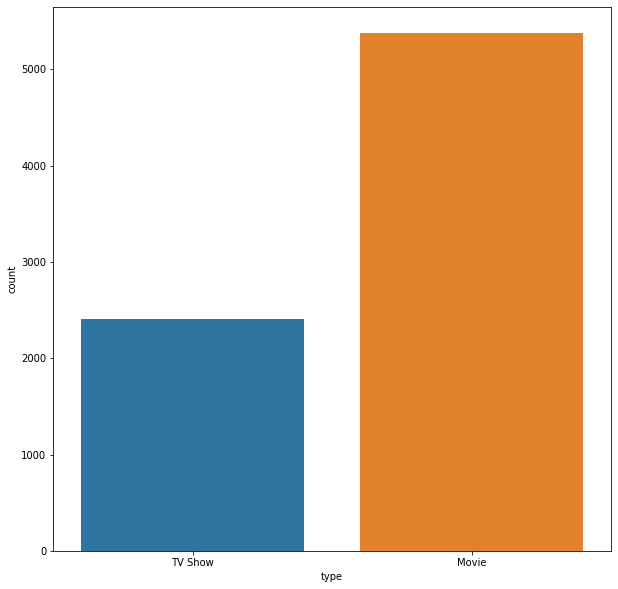

In [67]:
# for type column in dataset count plot
sns.countplot(x='type', data = netflix_df)

**from above count plot we conclude that movies type have more count than TV Shows type**

**Countrywise netflix contents** 

In [68]:
import plotly.express as px
country = netflix_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

# **2.Different Ratings on the Platform**

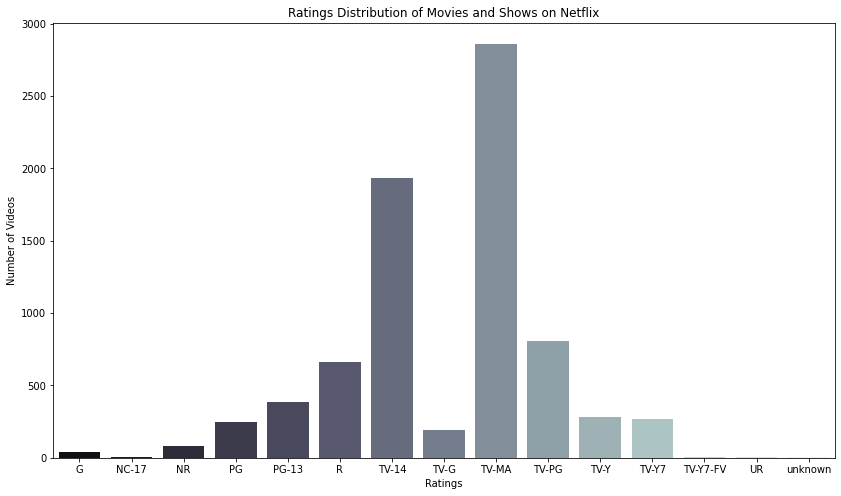

In [69]:
a = plt.figure(figsize=(14,8))
df = netflix_df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= df['rating'], y=df['show_id'], palette='bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

 **Most content on Netflix is rated for Mature Audiences and over 14 years old**

# **3.Title Column**


In [70]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

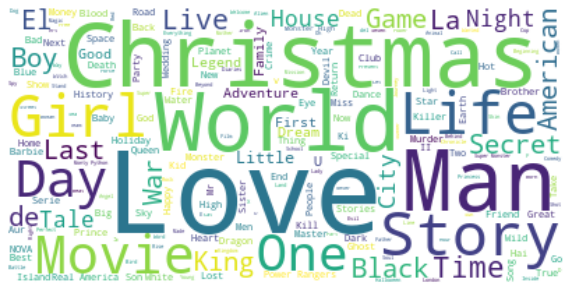

In [71]:
#subsetting df
df_word_cloud = netflix_df['title']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like words like "Love", "Man", "World", "Story" are very common in titles.
However, we are suprised by the overwhelming number of content having "Christmas" in their title.

We are suspecting "Christmas" titles to be a very seasonal thing with most of the shows likely to be released during the onth of December. However, we do not have the release month in this data to conform my hypothesis.

# **4.Director Column**

In [72]:
#looking at director series
netflix_df.director

0                 unknown
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784              unknown
7785              unknown
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

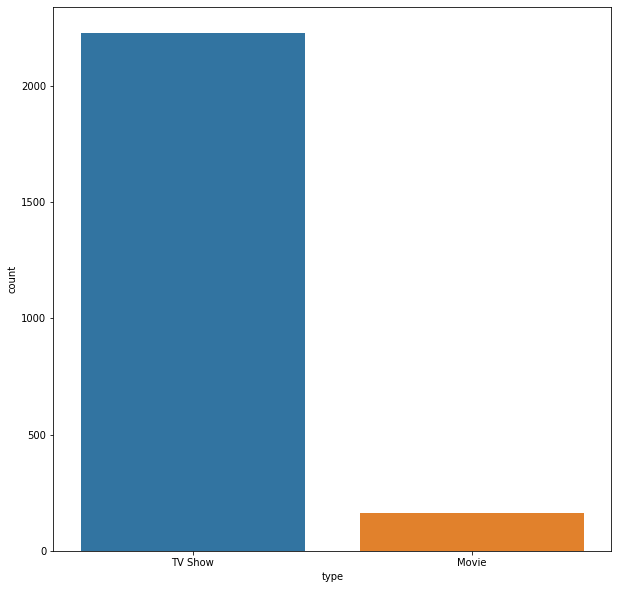

In [73]:
#Looking for which category have maximum nulls in director column
missing_df=netflix_df[netflix_df['director']=='unknown']
sns.countplot(missing_df['type'])

**From above Bar plot we conclude that Most of the missing values of director column are for TV Shows.**

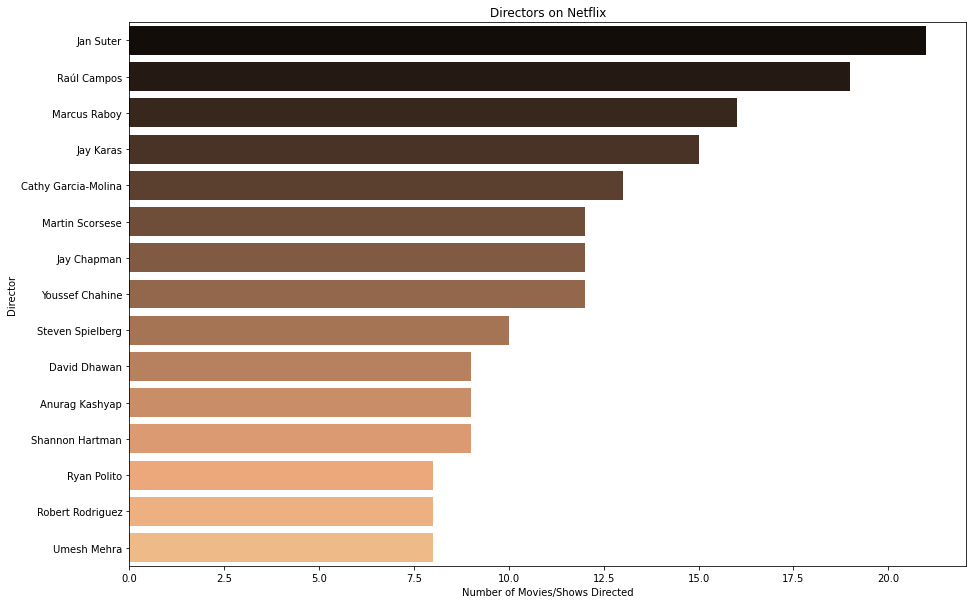

In [74]:
a=netflix_df[netflix_df.director != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(15)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'id',data = a , palette= 'copper')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10directors = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(10)['Director'].to_list()

**Top Directors on Netflix are:**
1. **Jan Suter**
2.**Raul Campos**
3.**Marcus Raboy**
4.**Jay Karas**
5.**Cathy Garcia-Molina**


# **4.Cast Column**

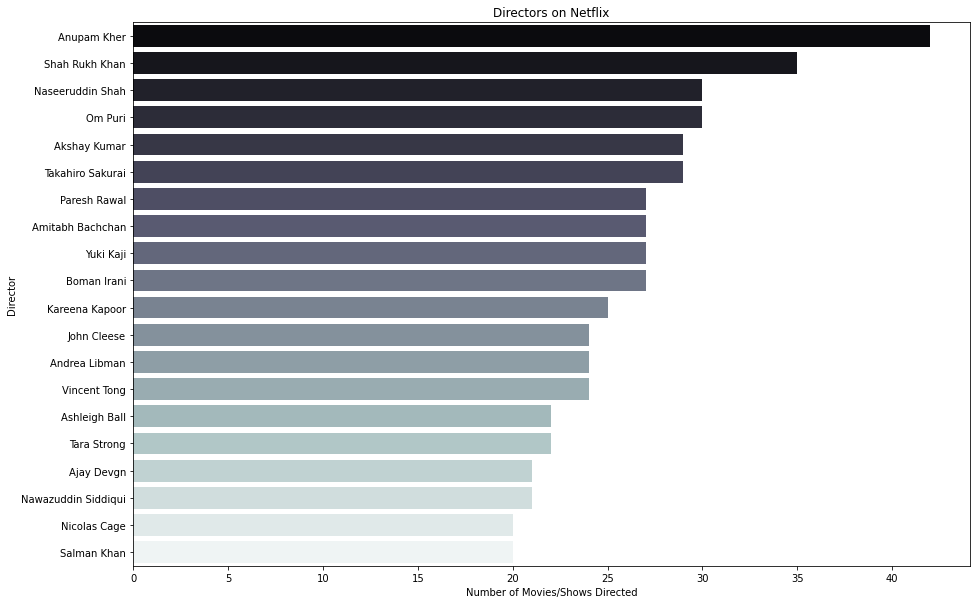

In [75]:
a=netflix_df[netflix_df.cast != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'id',data = a , palette= 'bone')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10actors = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()['Actor'].to_list()

---
> **Top Actors on Netflix are:**
1. **Anupam Kher**
2.**Shah Rukh Khan**
3.**Naseeruddin Shah**
4.**Om Puri**
5.**Akshay Kumar**

---

In [76]:
#count of unique column
netflix_df.country.nunique()

682

In [77]:
# Looking for countries and number of netflix productions
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(netflix_df['country'][i])== str:
    split=netflix_df['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if netflix_df['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if netflix_df['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [78]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [79]:
#Top 20 countries
top_countries=country_df.head(20)
top_countries = top_countries[top_countries['country']!='']
top_countries

,country,Productions,TV-Shows,Movies
0,United States,6,1,5
1,Mexico,2,1,1
2,India,2,0,2
3,Thailand,1,0,1
4,Egypt,1,0,1
5,Poland,1,1,0
6,Brazil,1,1,0
7,Singapore,1,0,1
8,Turkey,1,1,0


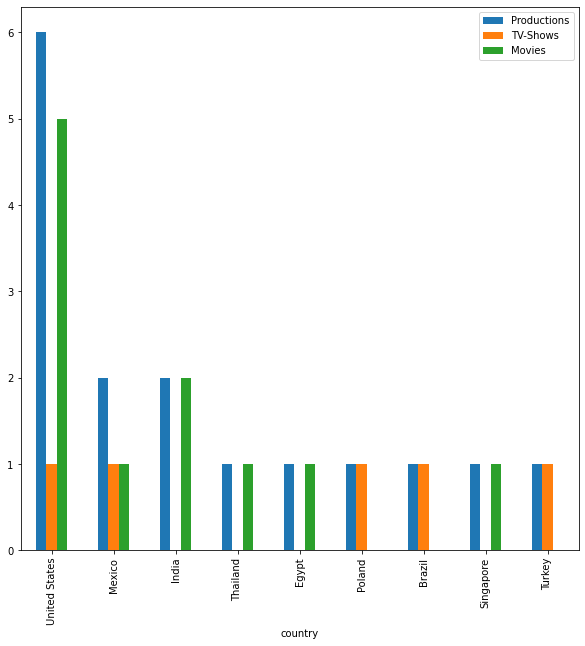

In [80]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

**Duration of Movies on Netflix**

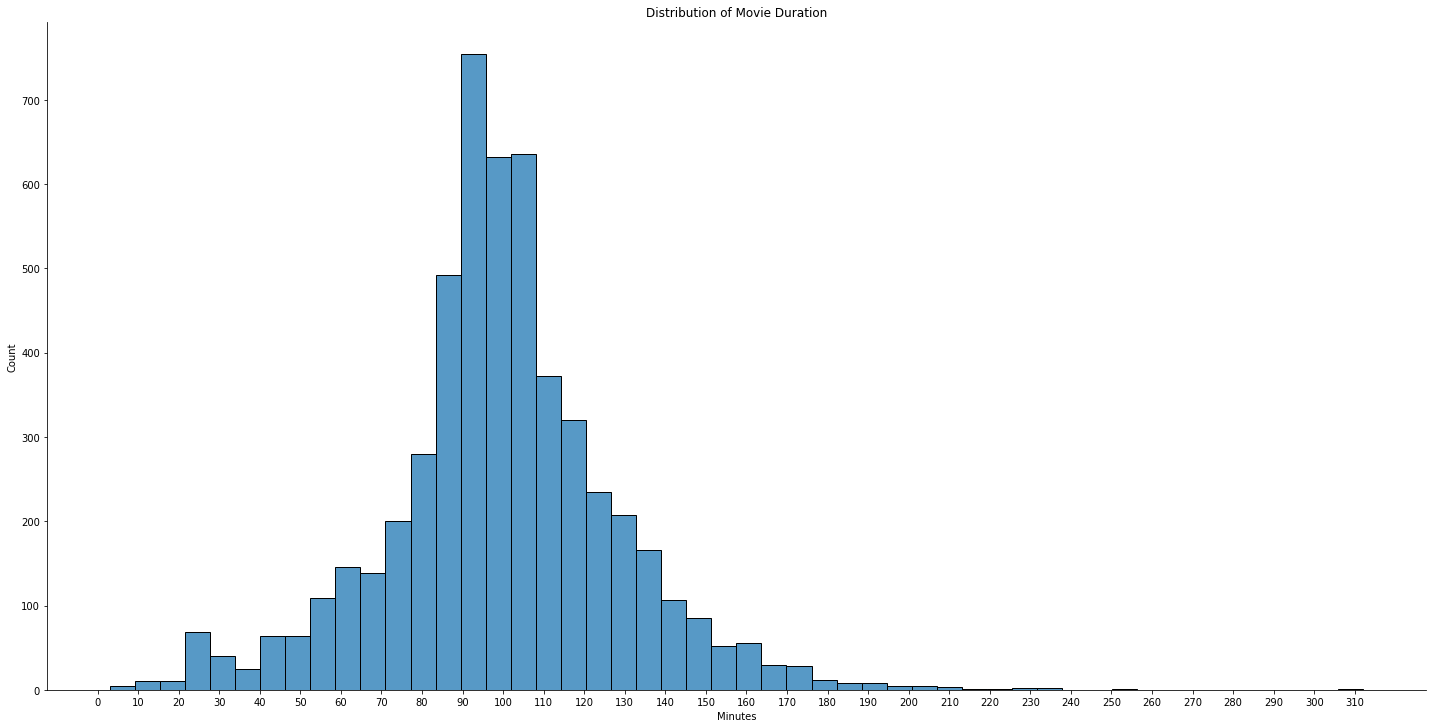

In [81]:
a=netflix_df[netflix_df['type']=='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Duration',  data = country_list, kind = 'hist', height=10, aspect=2, bins = 50)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,country_list.Duration.max()+1,10))

**Most movies on Netflix have a duration range from 90 to 110 minutes**

###**Duration of TV shows on Netflix**

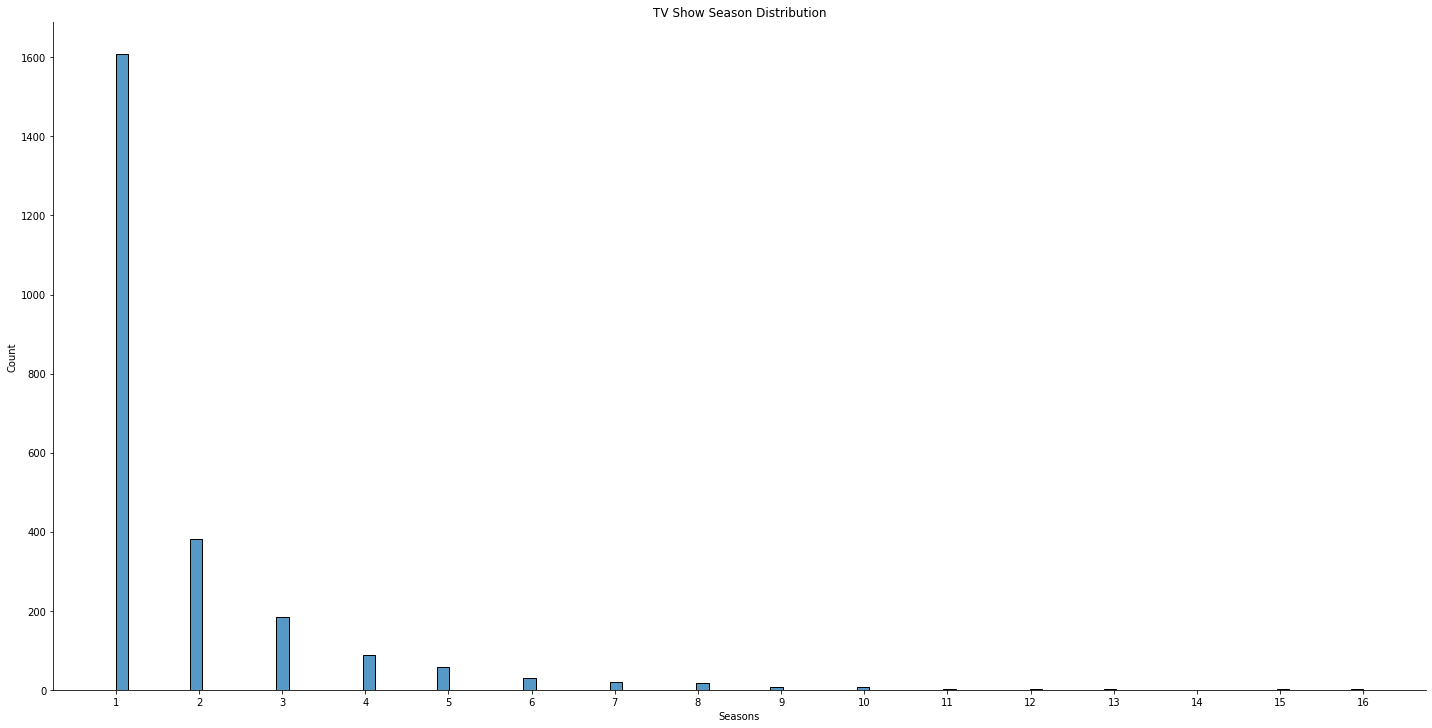

In [82]:
a=netflix_df[netflix_df['type']!='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Seasons' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Seasons',  data = country_list, kind = 'hist', height=10, aspect=2)
a = plt.title('TV Show Season Distribution')
a = plt.xlabel('Seasons')
a = plt.xticks(ticks = np.arange(country_list.Seasons.min(),country_list.Seasons.max()+1,1))

**Histogram plot of dates of number of shows/movies added by the Streaming giant**

<Figure size 1008x576 with 0 Axes>

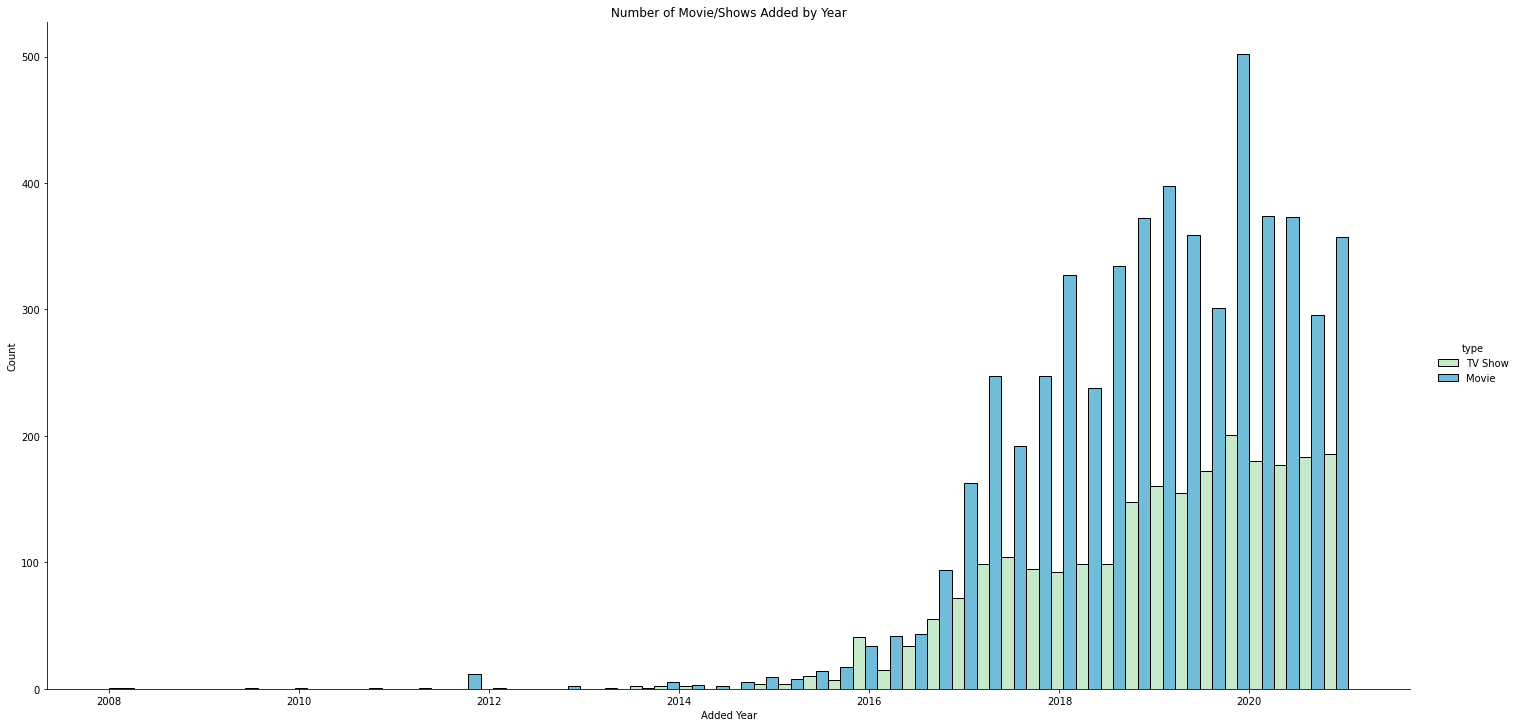

In [83]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x= netflix_df['date_added'], hue = 'type', data = netflix_df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')

**Most TV shows on Netflix have a span of 1 season only**

# Bivariate Analysis

**Country Wise Trend Analysis**

* country vs genre
* country vs rating
* country vs type
* country vs year_added
* country vs top directors
* country vs top cast
* country vs release year

#Plotting country wise trend for genre preference

## All country's genres preference were plotted

In [86]:
content = netflix_df.loc[:,['title','date_added','release_year', 'duration', 'type']].dropna().copy()

In [87]:
content['date_added'] = content['date_added'].dt.year

In [88]:
#Assuming TV shows release new seasons every year, we'll be adding a duplicate of the show for each season.
def season(row):
  release = row['release_year']
  added = row['date_added']

  if row['type'] =='TV Show':
    seasons = int(row['duration'][0])
    b = []
    for i in range(1, seasons+1):
      if i ==1:
        b.append(release)
      else:
        b.append(b[-1]-1)
    a = b
  else:
    a = []
    a.append(row['release_year'])      
  
  return a

content['Released Years'] = content.apply(lambda x: season(x),axis=1)

In [89]:
compare = content.explode('Released Years')

In [90]:
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [91]:
data = pd.concat([tv, movie], axis = 0)

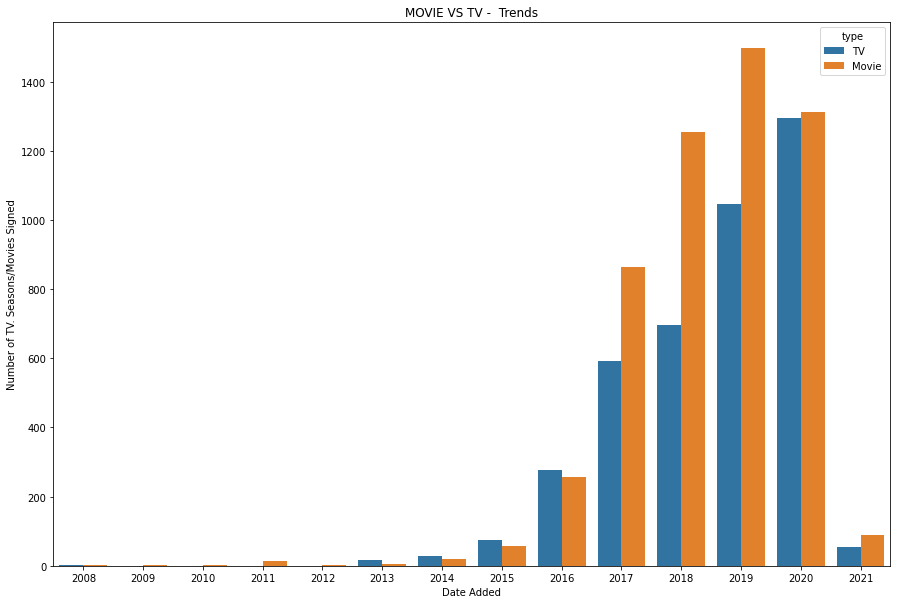

In [92]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'date_added', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Date Added')
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')


---
> * **The above graph depicts seasons of TV shows signed vs the movies signed**
> * **This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier**
> * **We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year**
---

In [93]:
tv = compare[compare['type'] == 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [94]:
data = pd.concat([tv, movie], axis = 0)

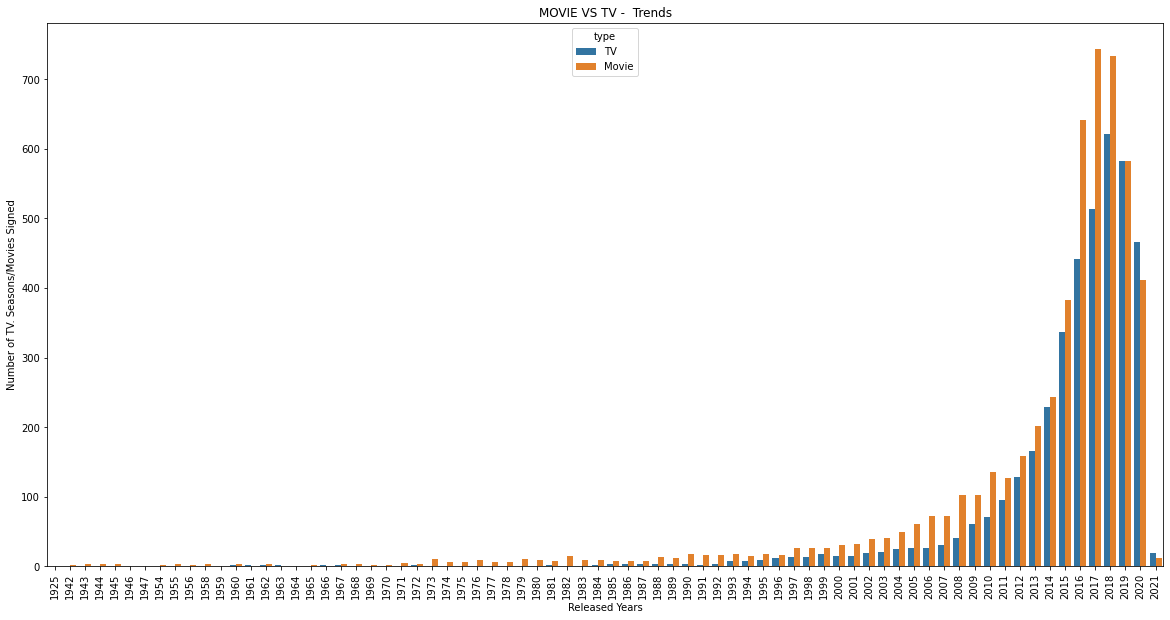

In [95]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Released Years', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Released Years')
plt.xticks(rotation = 90)
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

----
> * **The above graph depicts an estimation of seasonal TV show and Movie release date per each year. We make a general assumption that each show releases a season yearly which is often the case for most TV shows.** 
> * **There are certainly exemptions. Eg. Ozark was released in years 2017, 2018, 2020 and 2022.** [ *P.S: Brilliant slow burn. Do check it out!* ]
>* **We can observe that TV releases outnumbering movies from 2010. It is a known fact that each show contains multiple episodes, hence we can confidently say that significant amount of video content is being enlisted under TV shows from 2010**
> * **Years 2019, 2020 and 2021 see multi-episode TV seasons outnumbering movies signed per year**

#**Plotting country wise preferred rating for all countries**

In [100]:
#getting country wise rating trend
def get_country_ratings_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  grouped_df_ = df.groupby(['country_list','rating']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "rating", y="title", color="khaki", rot=45, figsize=(5,5))
    plt.title(f"{each}")

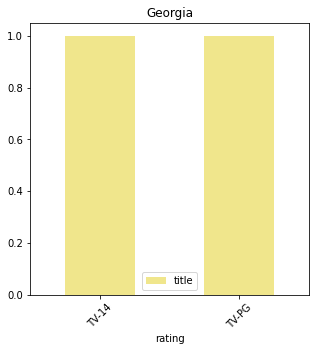

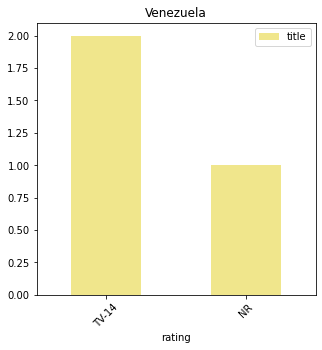

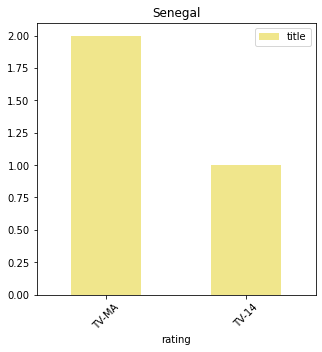

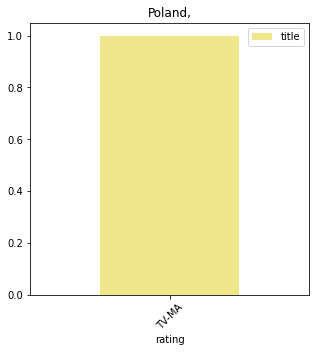

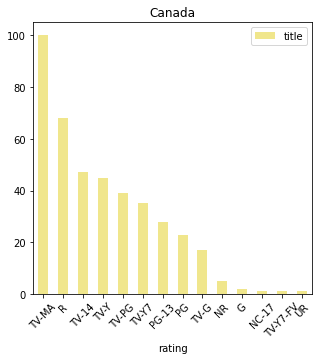

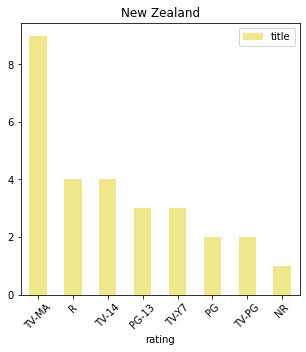

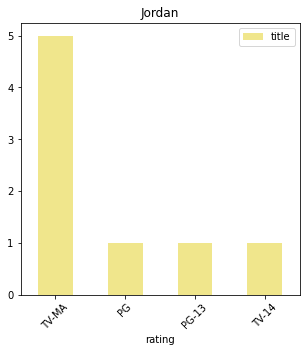

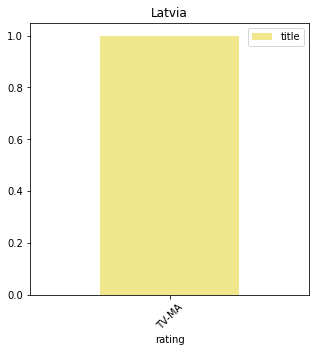

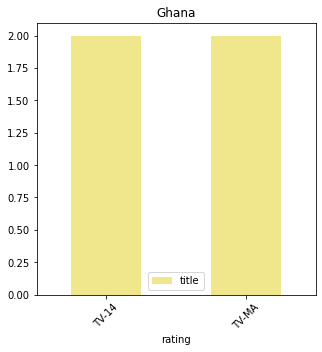

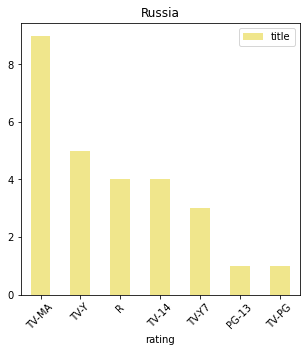

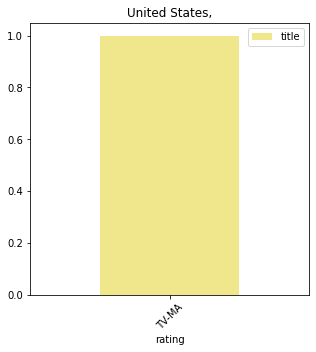

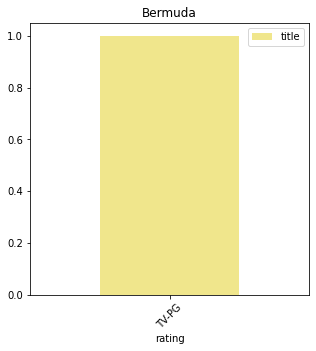

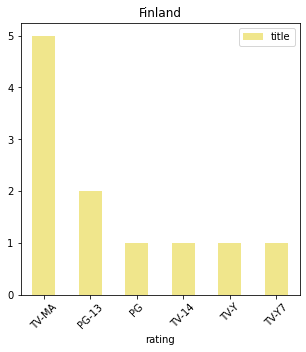

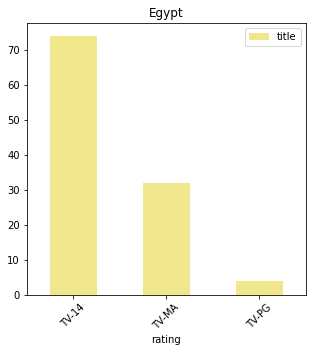

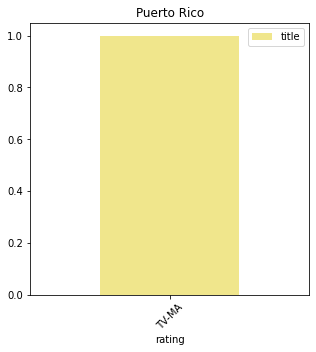

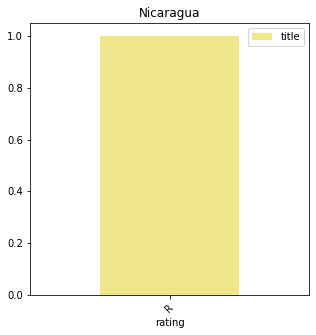

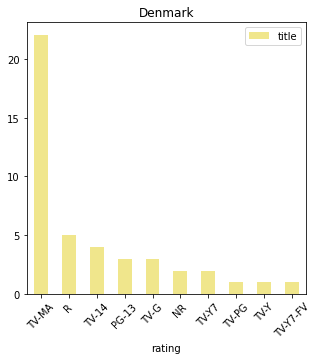

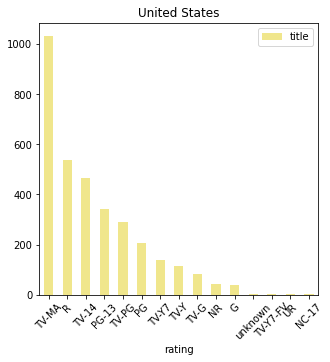

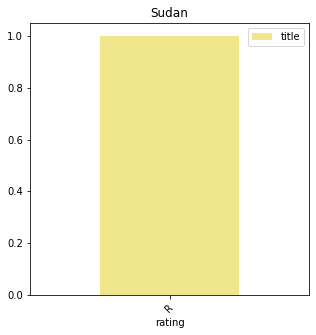

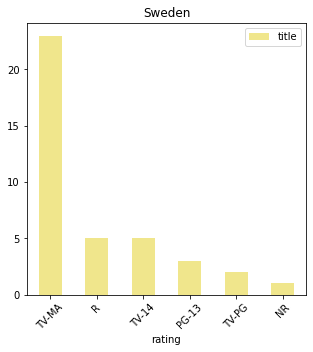

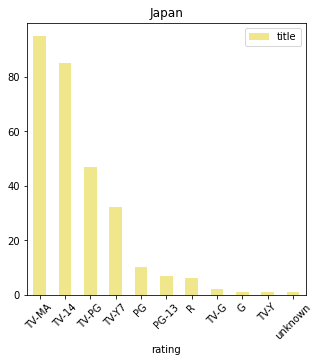

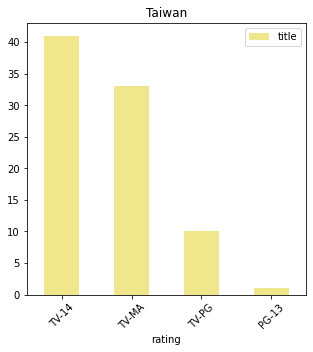

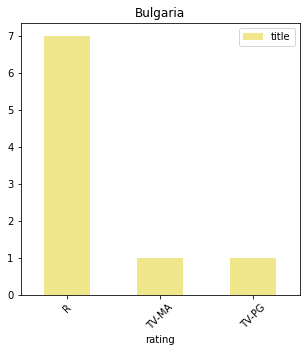

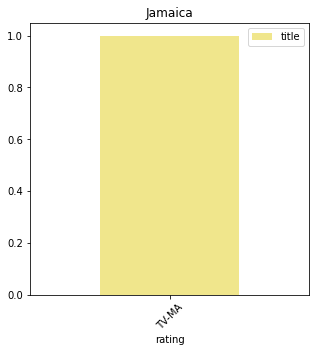

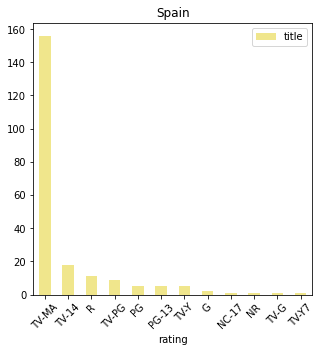

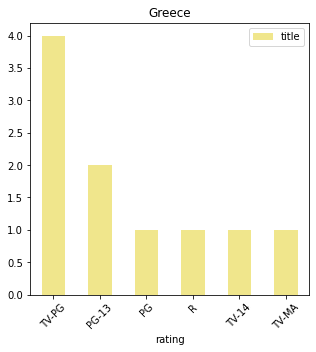

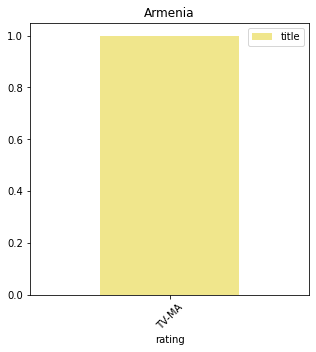

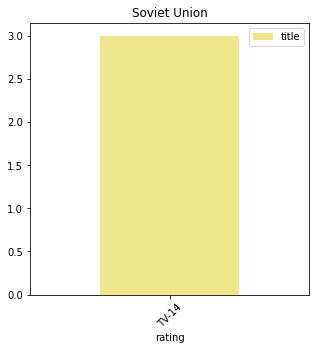

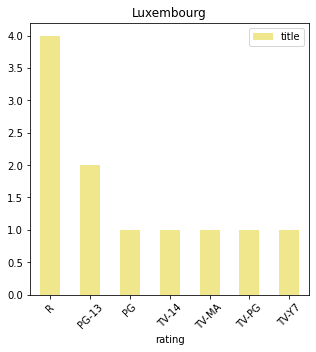

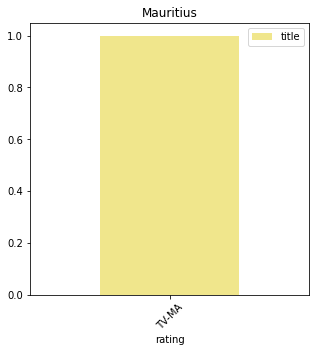

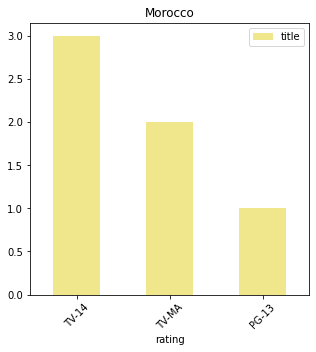

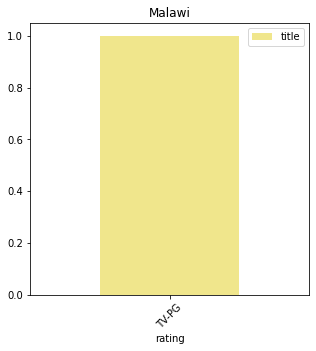

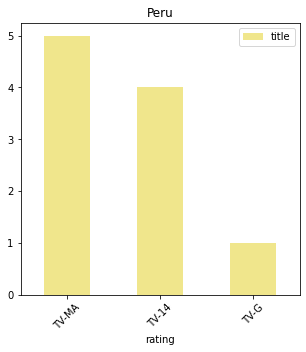

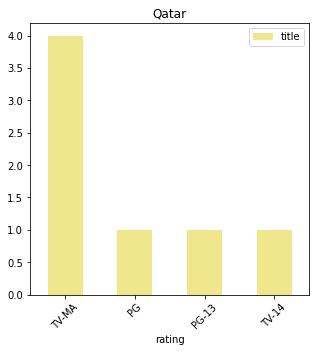

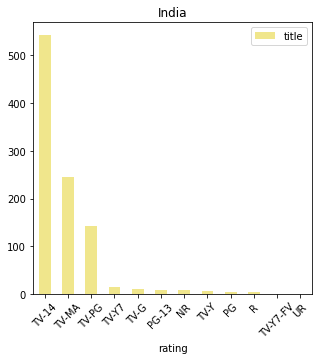

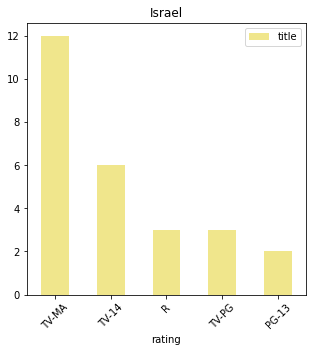

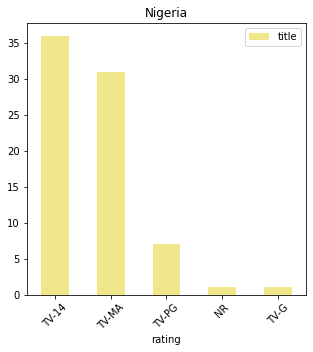

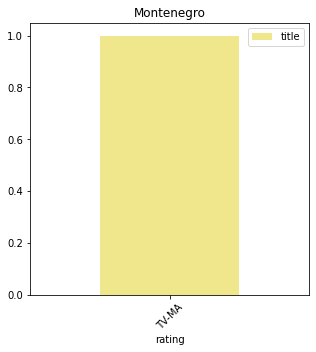

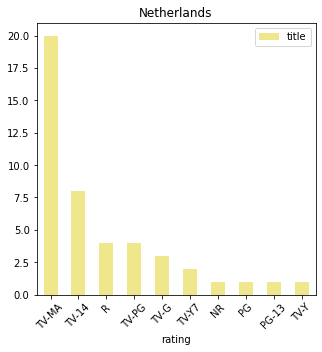

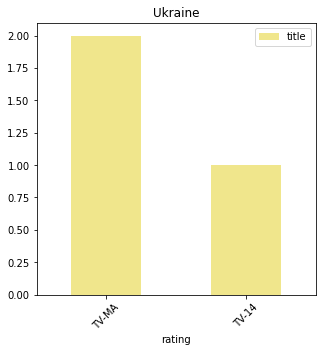

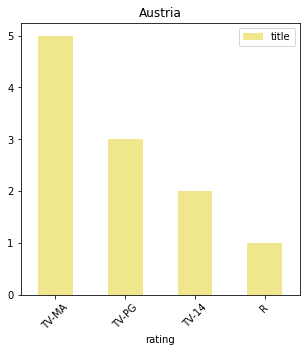

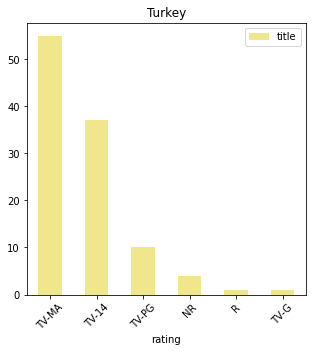

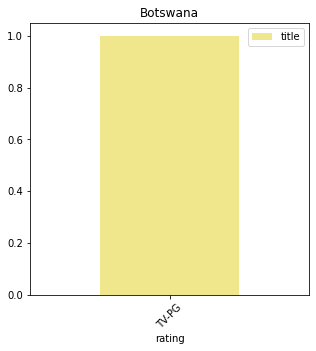

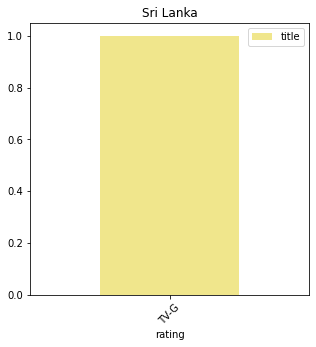

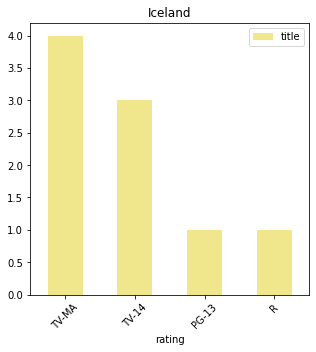

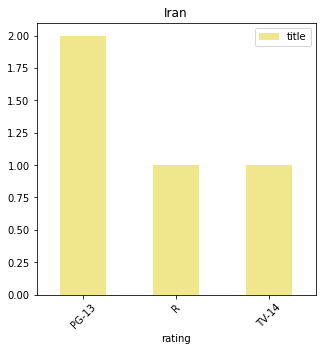

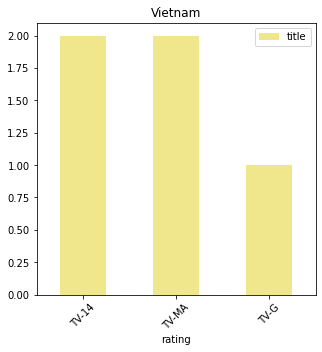

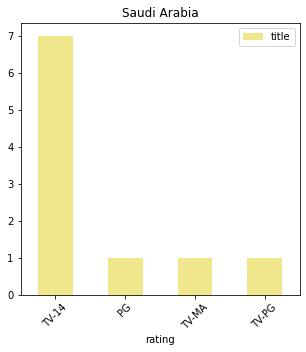

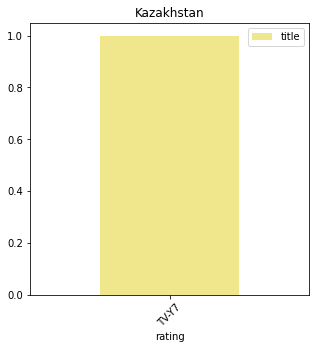

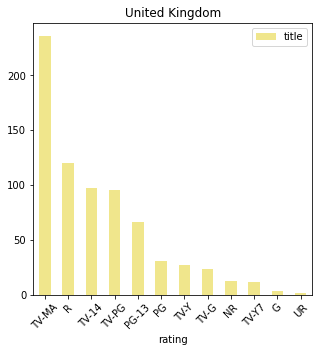

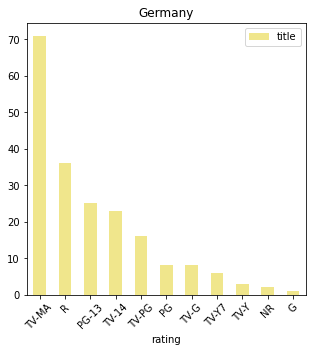

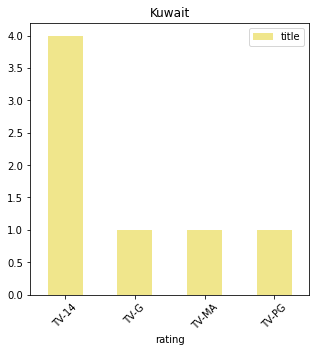

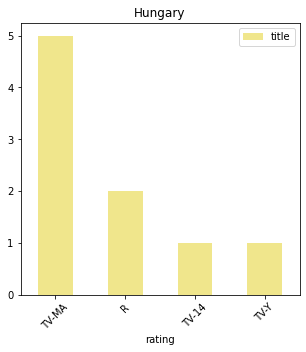

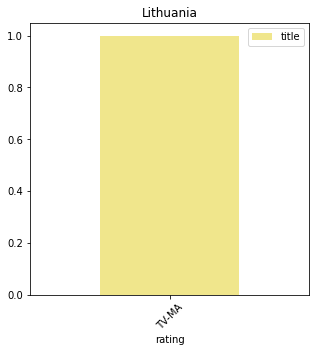

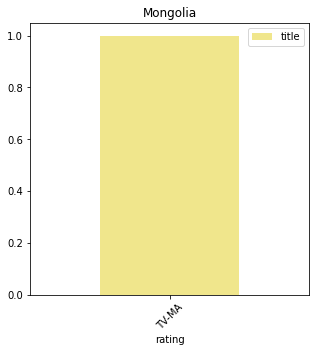

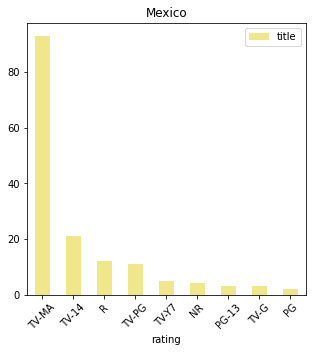

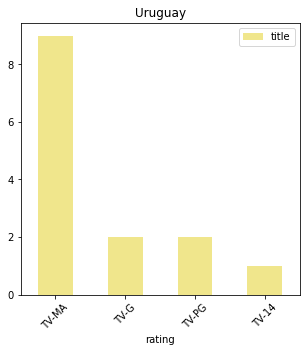

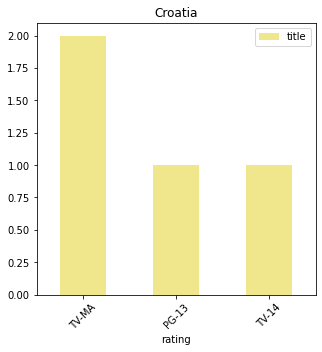

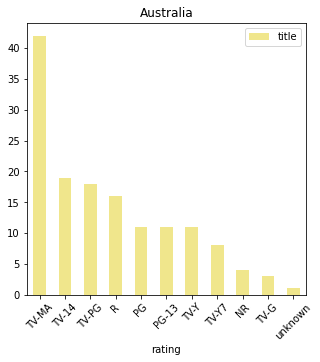

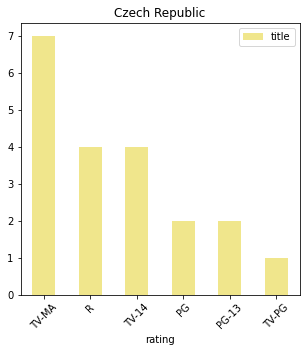

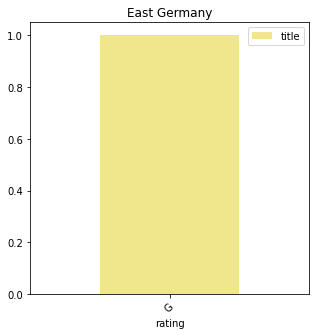

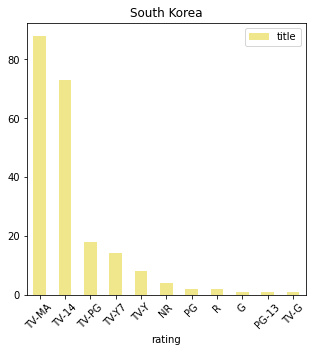

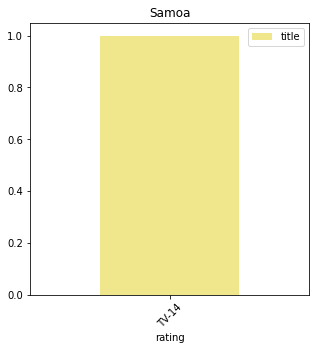

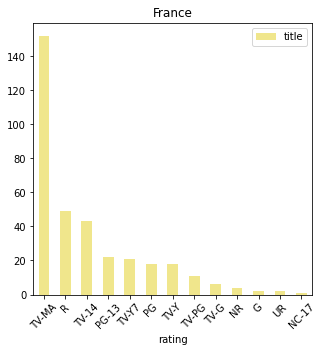

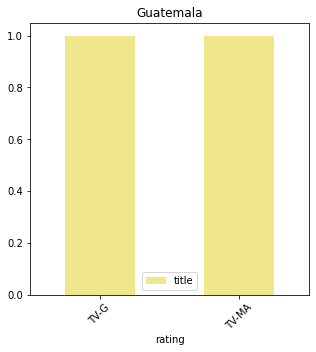

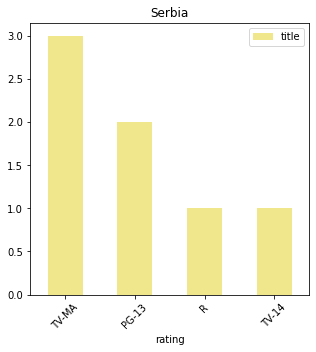

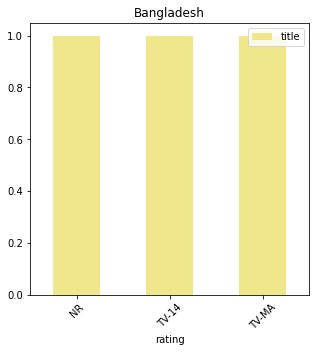

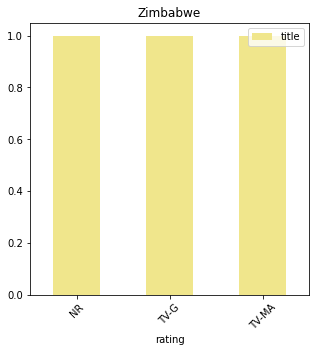

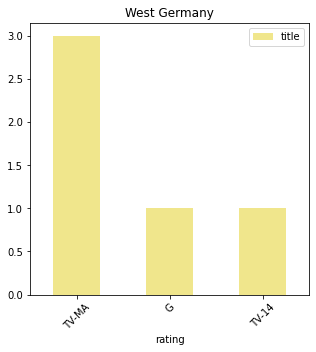

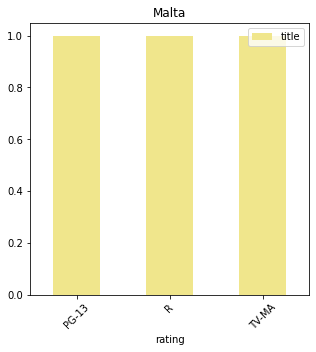

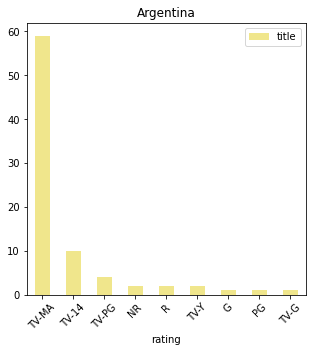

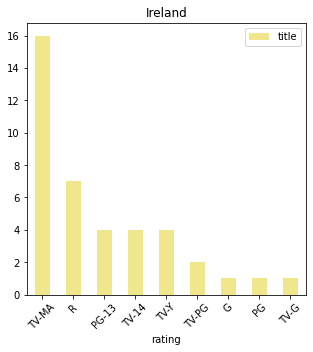

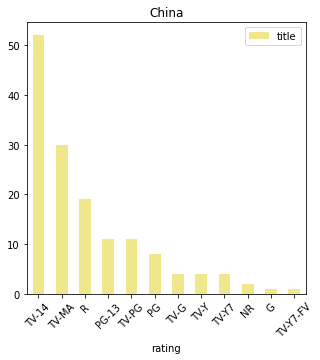

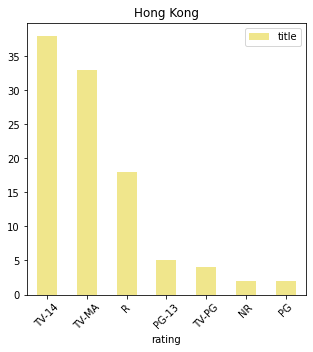

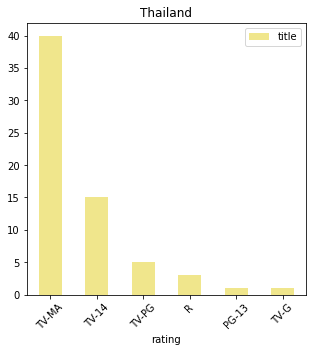

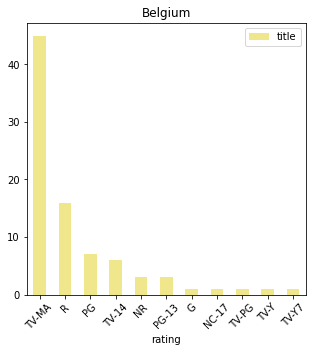

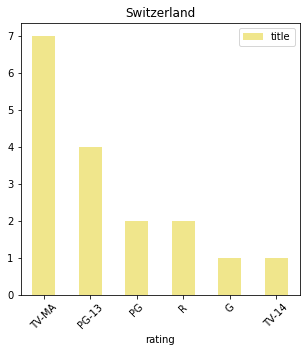

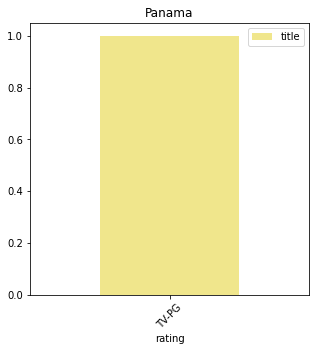

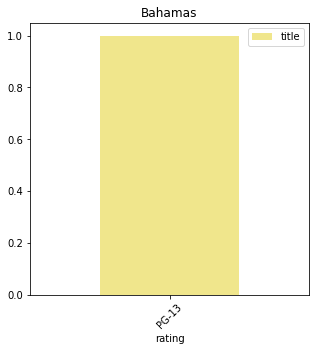

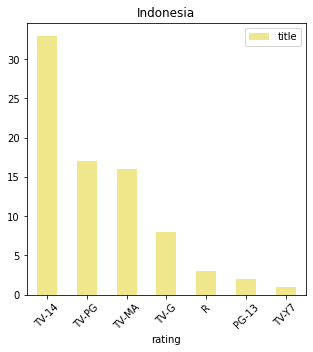

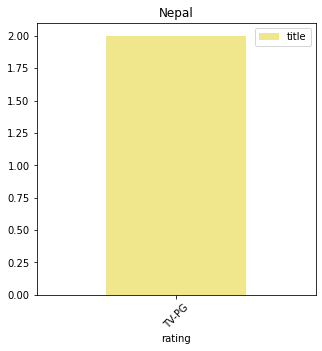

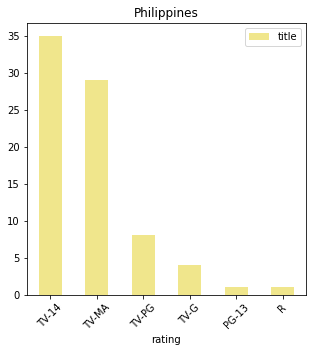

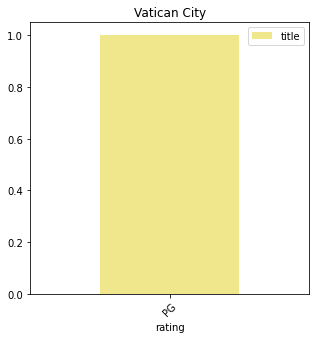

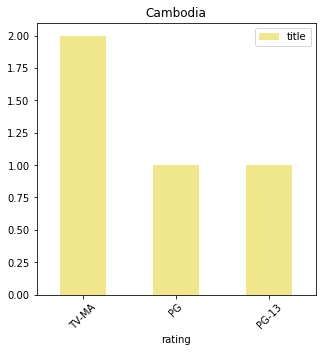

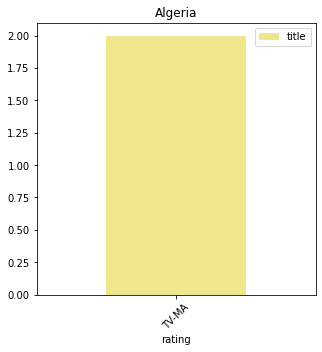

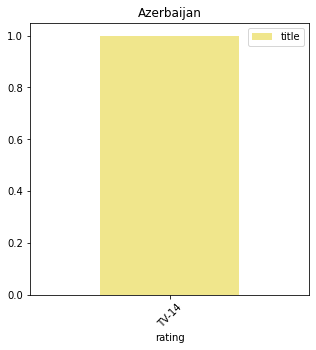

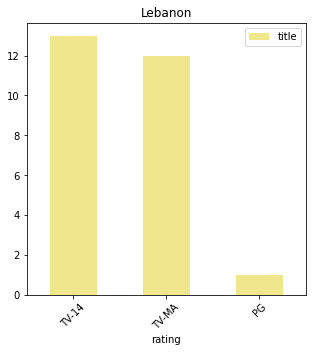

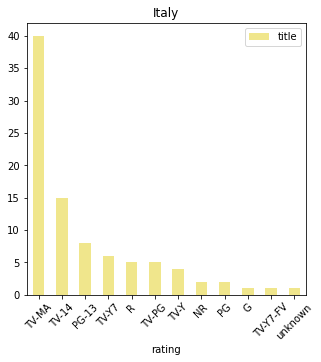

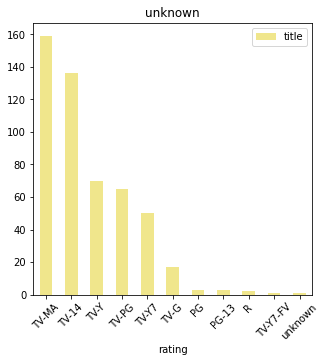

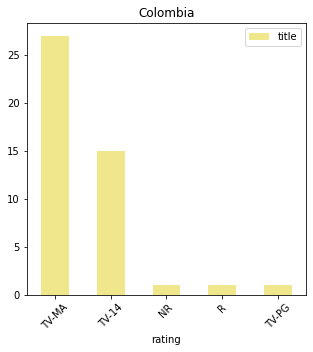

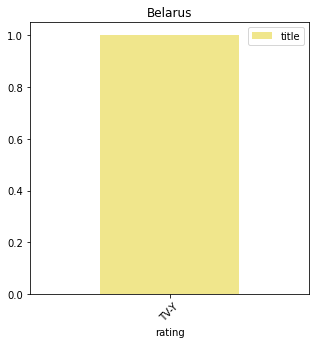

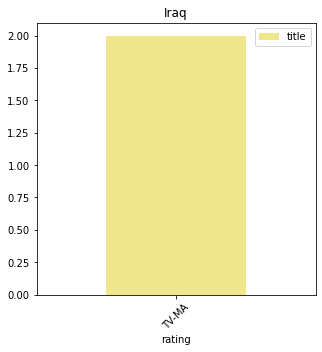

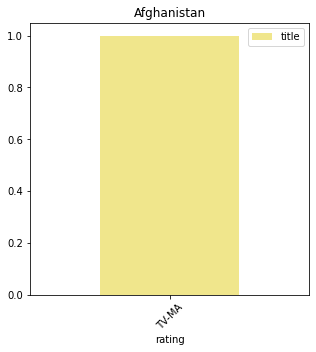

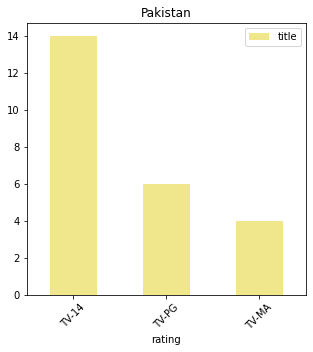

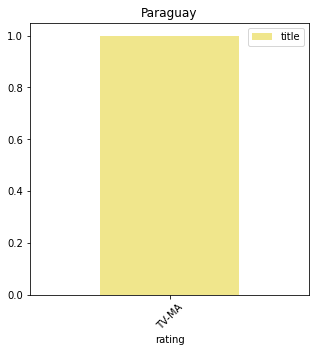

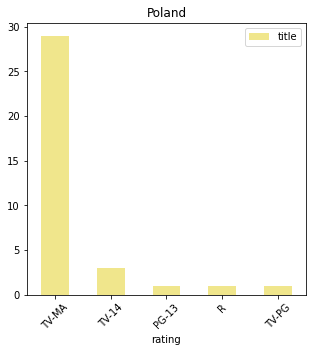

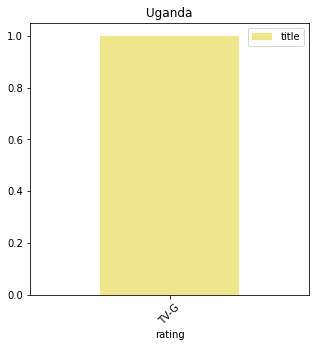

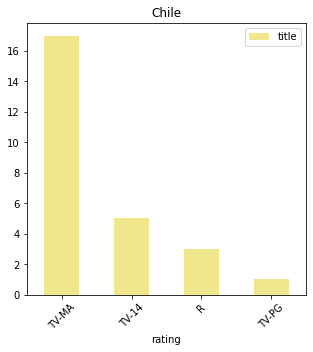

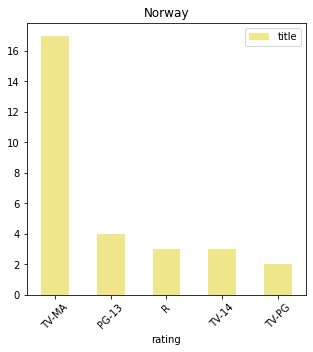

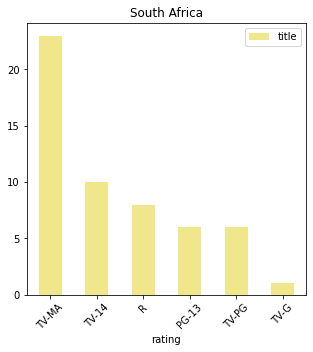

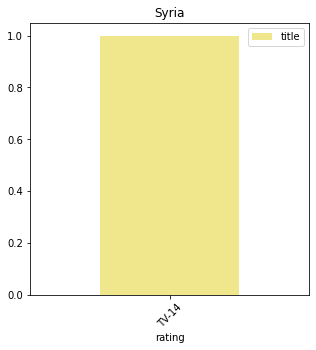

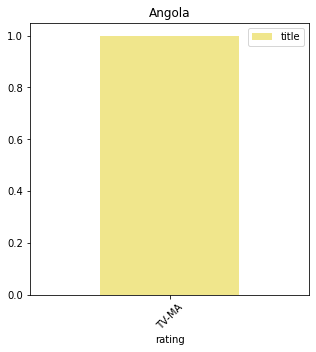

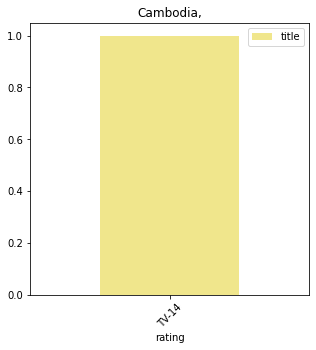

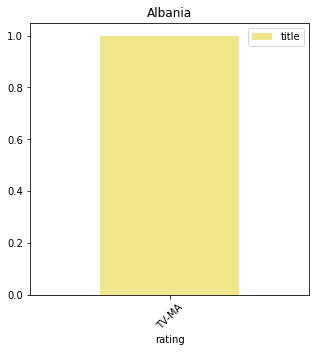

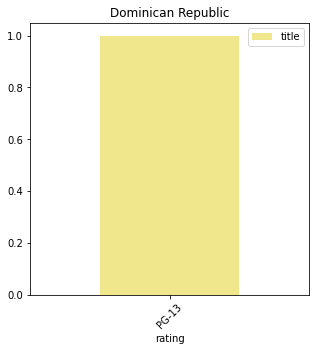

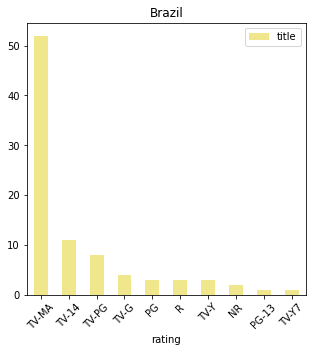

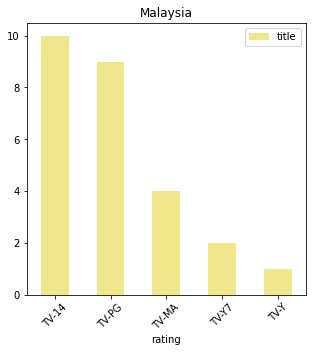

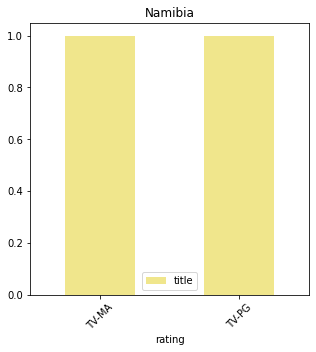

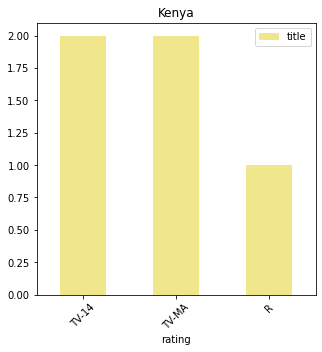

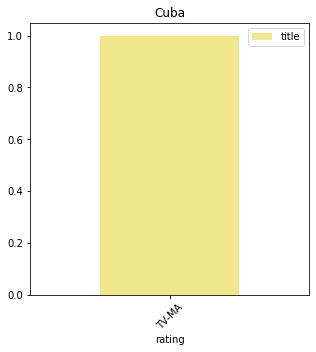

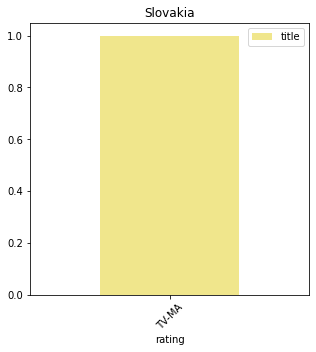

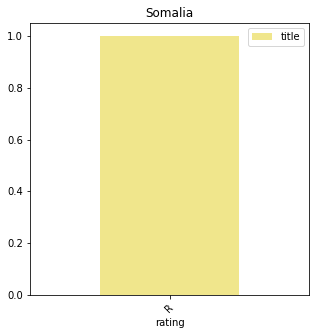

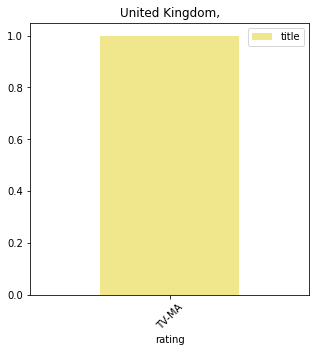

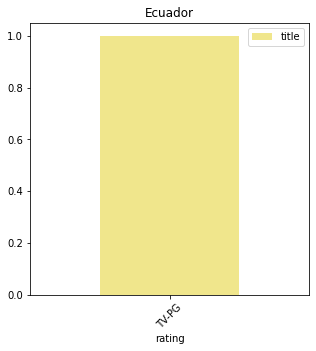

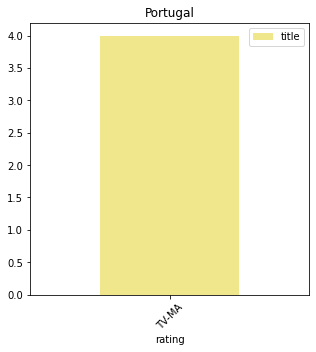

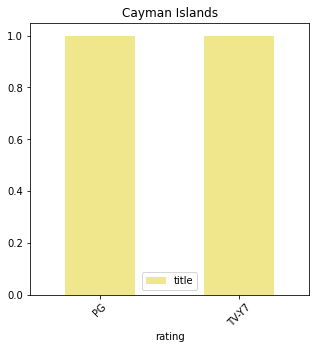

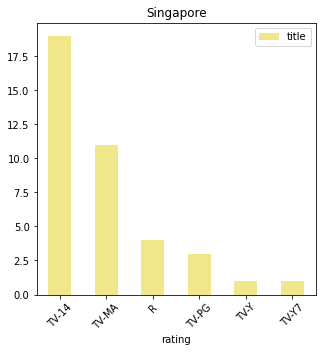

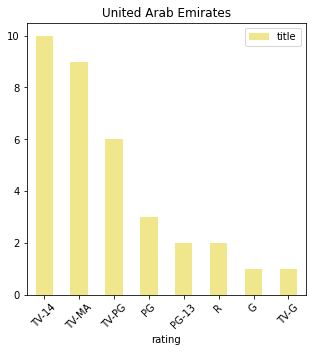

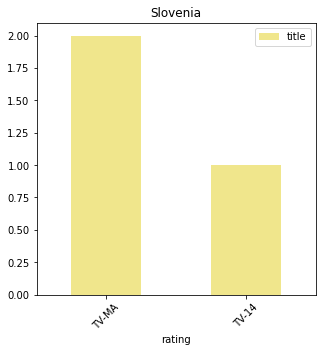

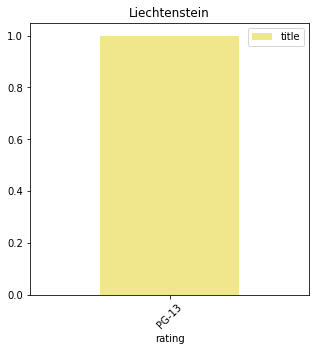

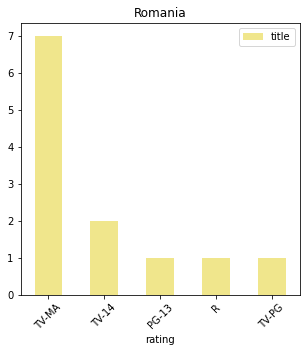

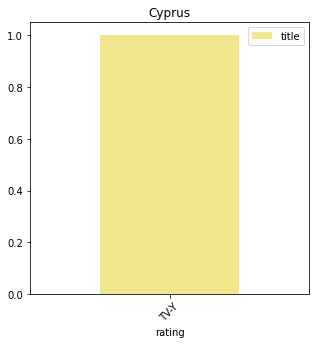

In [101]:
 get_country_ratings_trends(netflix_df)

#**Plotting country wise preferred 'type' for all countries**

In [102]:
#get all country type preference
def get_country_type_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  grouped_df_ = df.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="slateblue", rot=45, figsize=(5,5))
    plt.title(f"{each}")

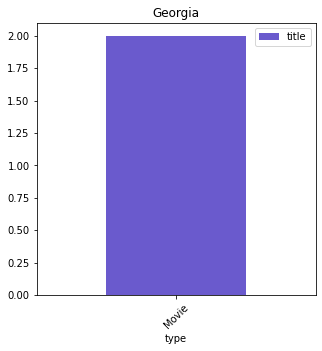

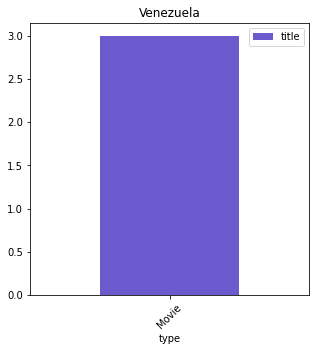

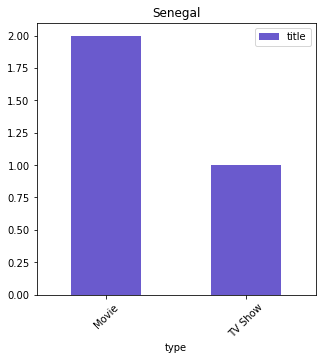

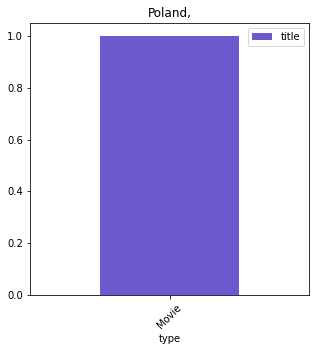

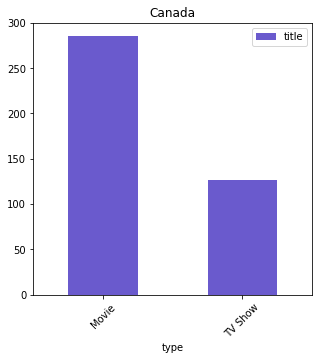

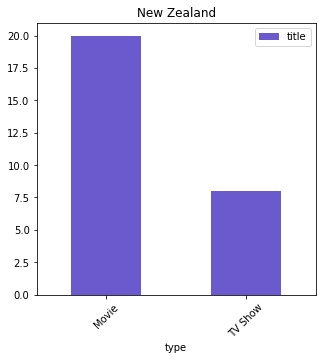

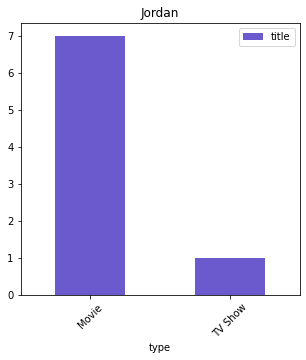

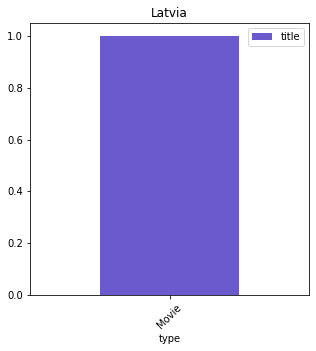

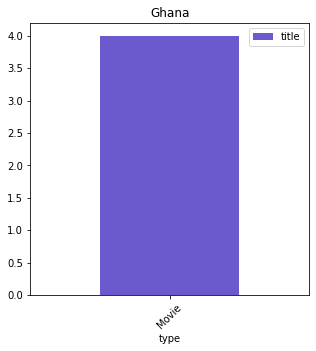

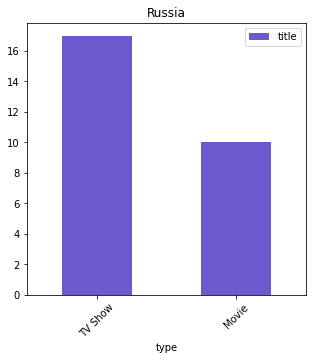

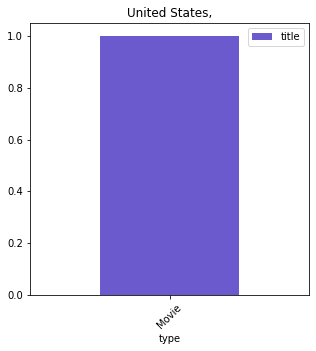

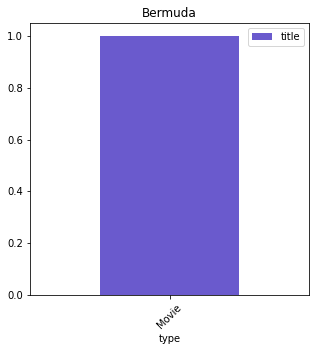

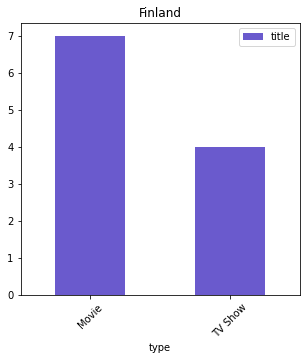

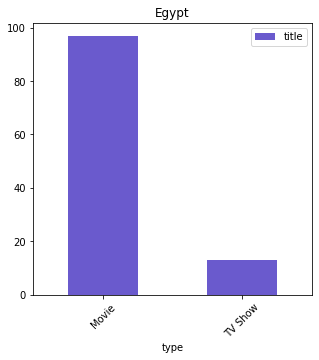

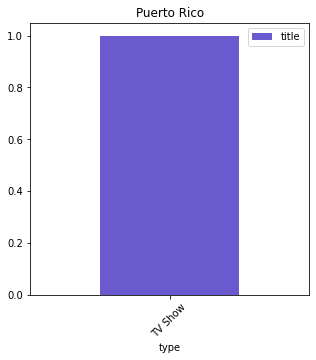

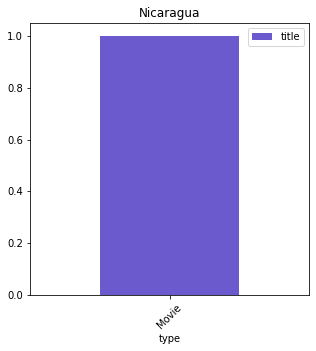

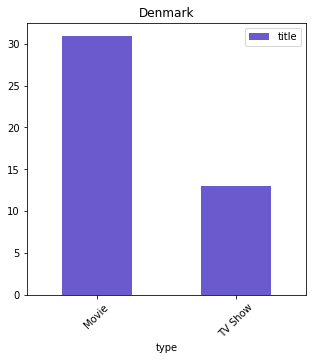

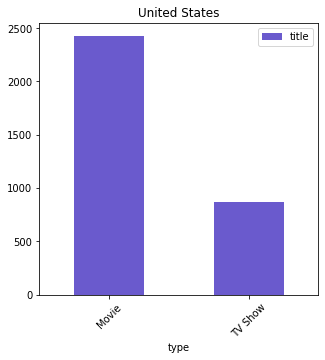

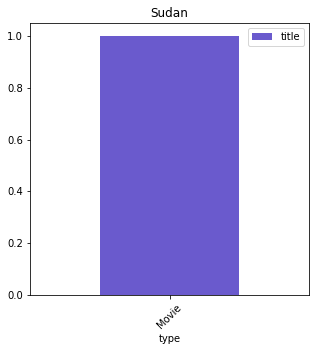

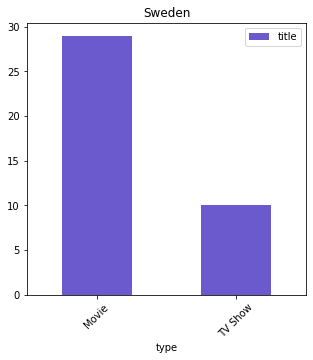

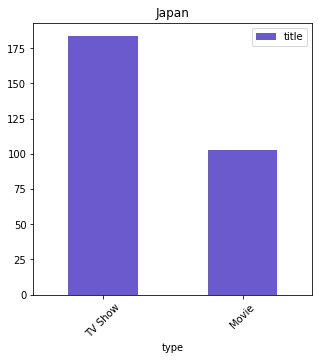

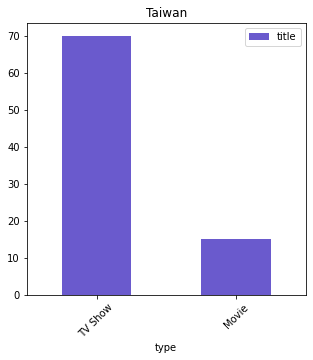

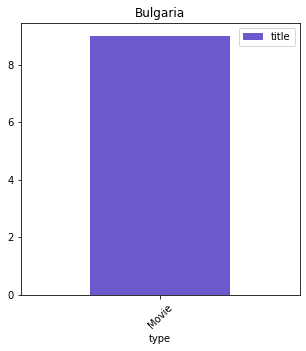

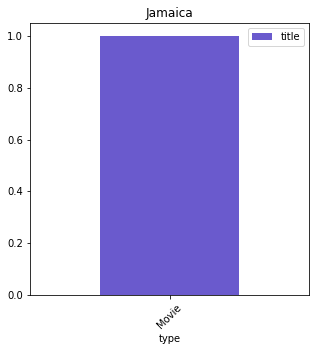

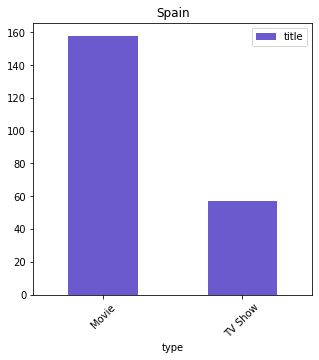

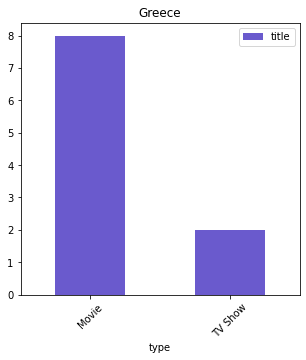

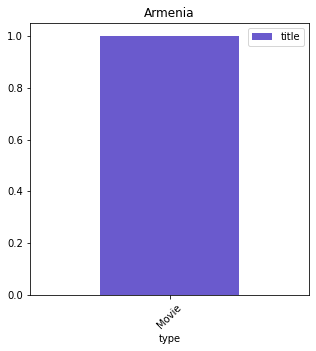

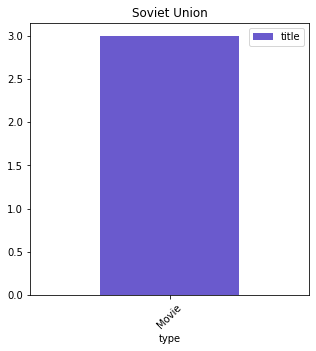

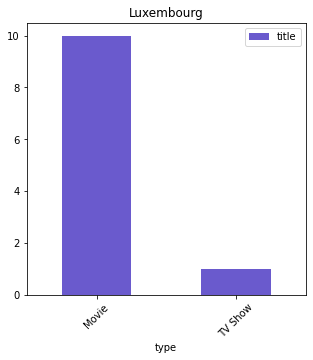

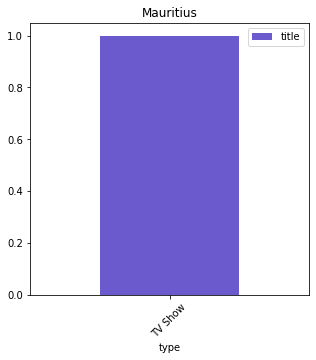

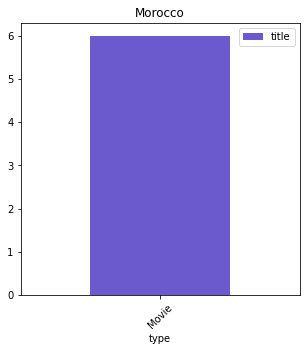

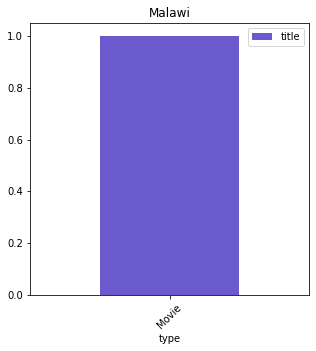

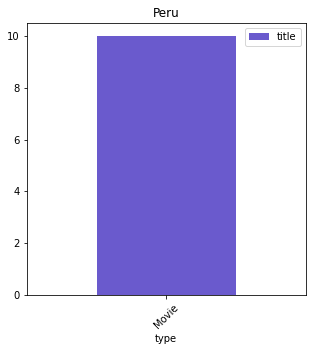

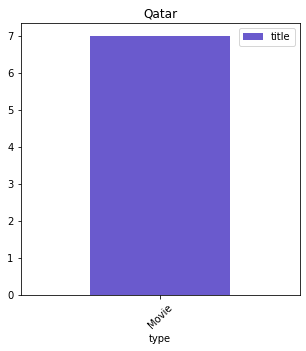

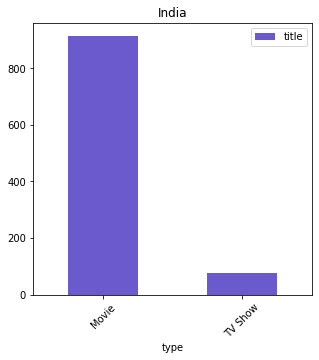

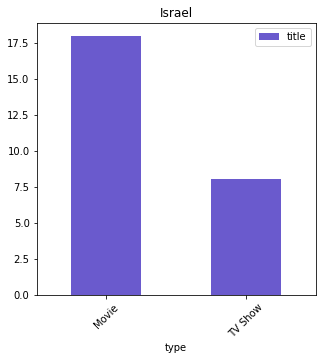

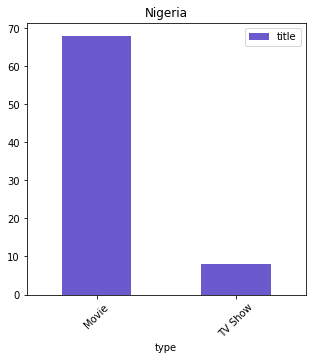

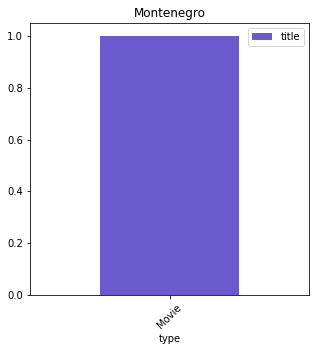

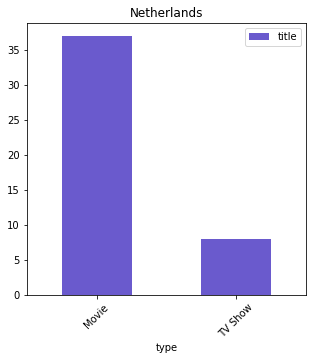

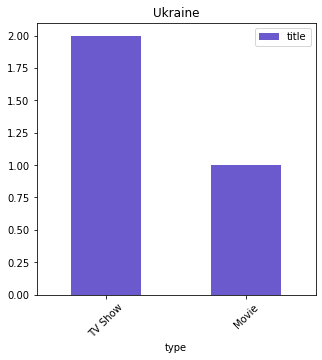

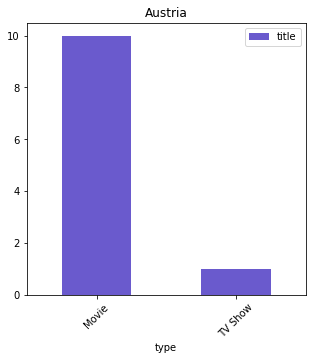

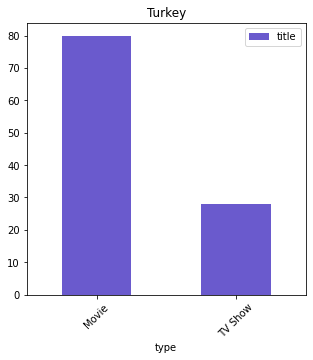

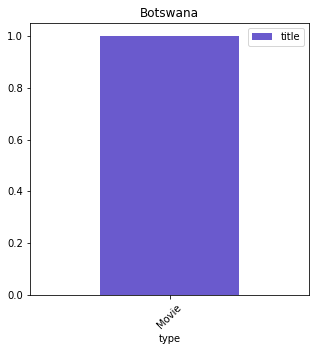

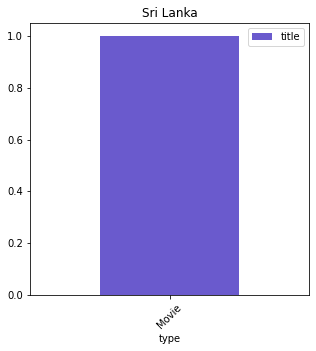

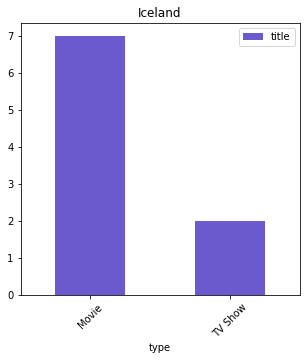

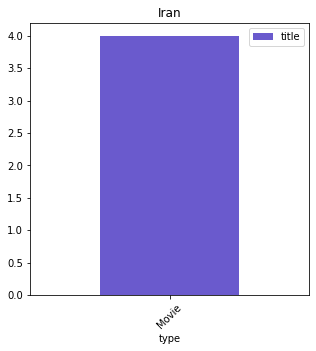

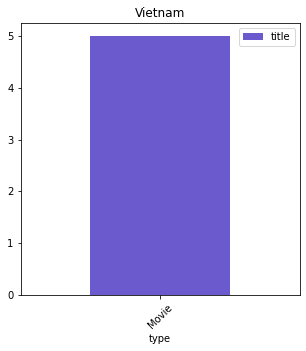

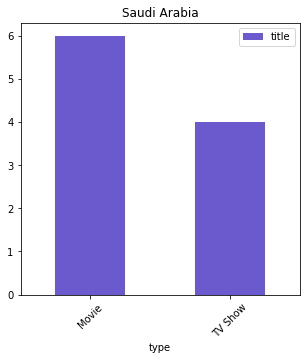

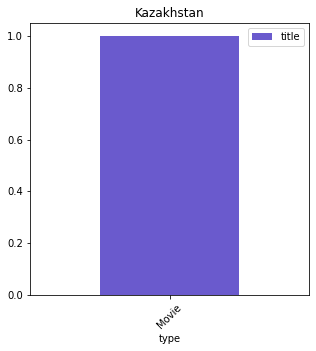

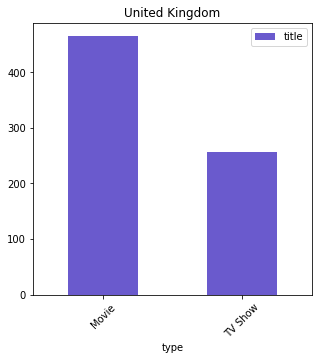

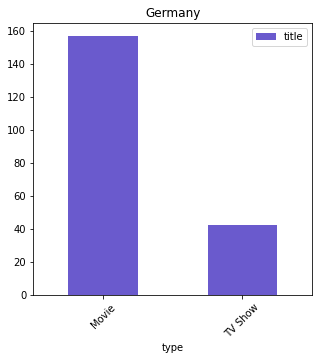

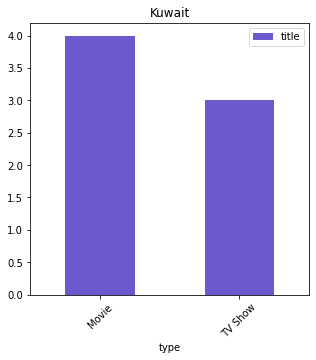

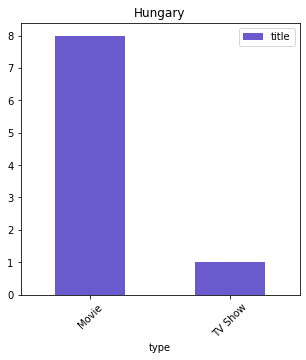

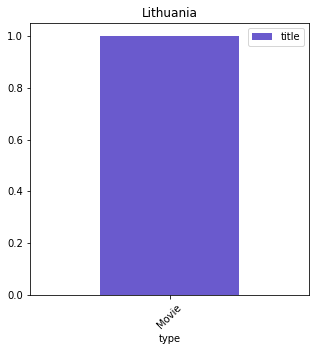

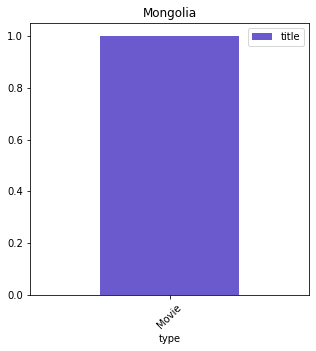

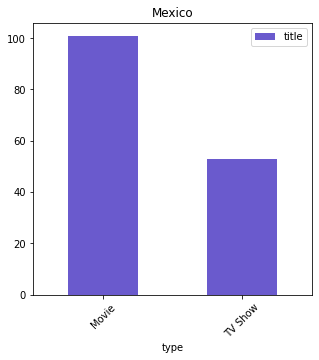

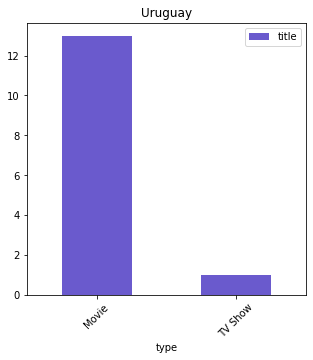

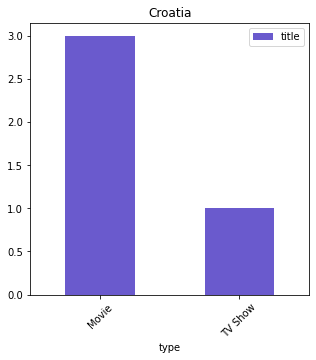

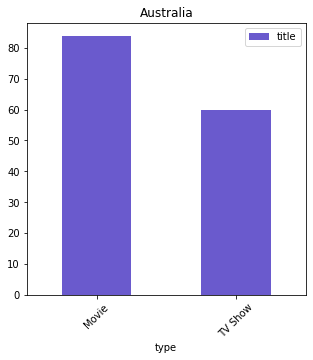

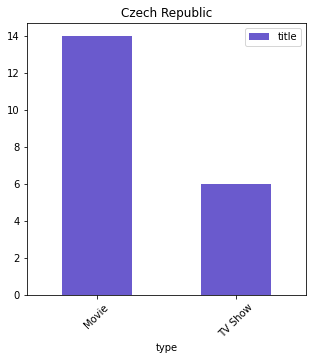

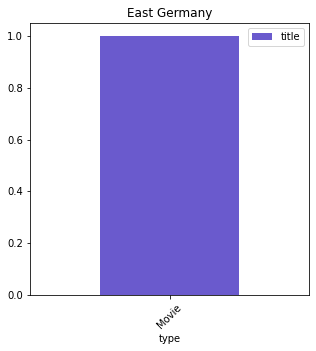

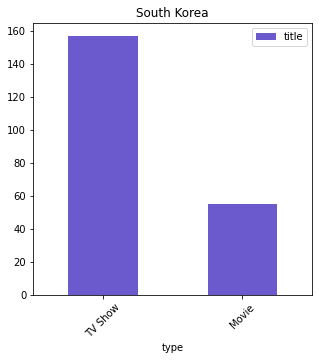

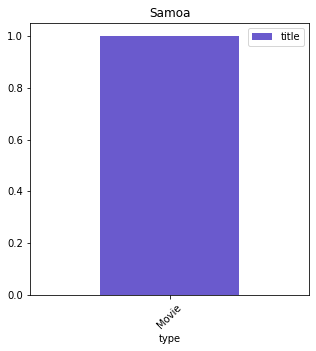

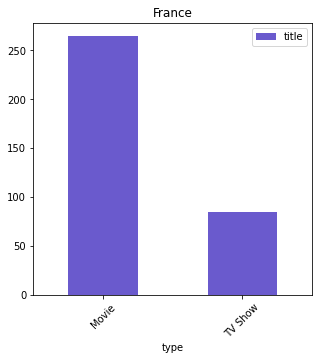

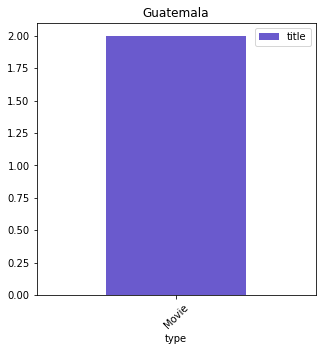

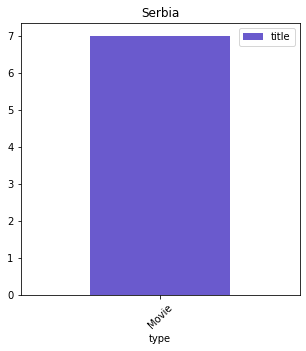

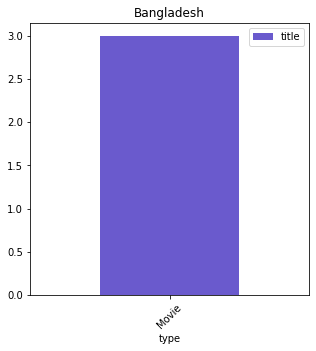

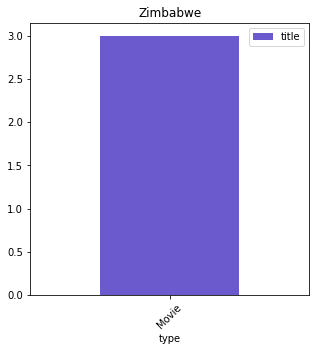

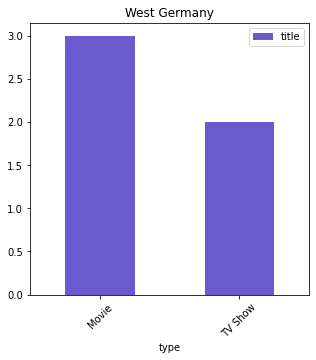

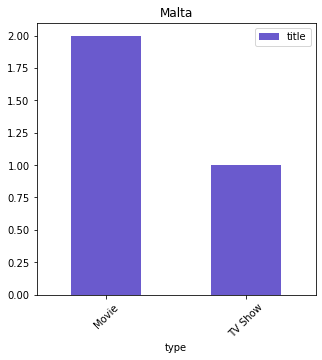

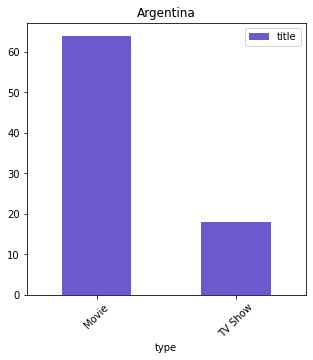

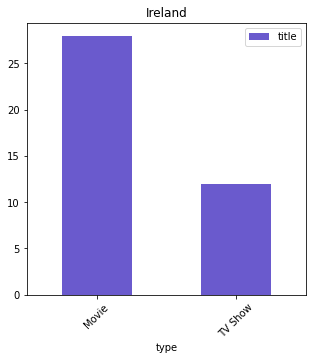

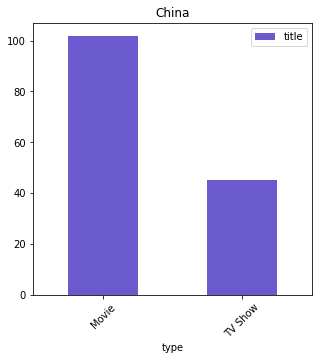

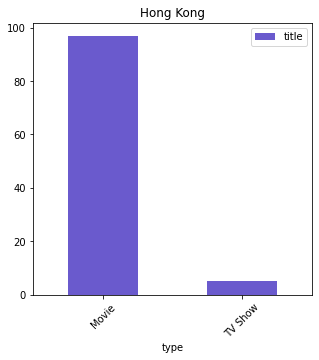

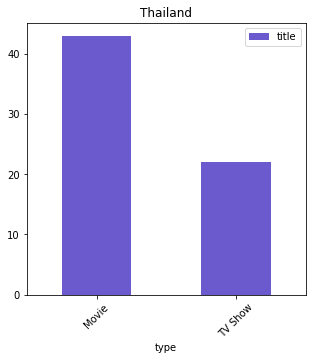

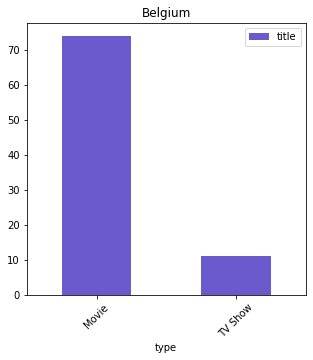

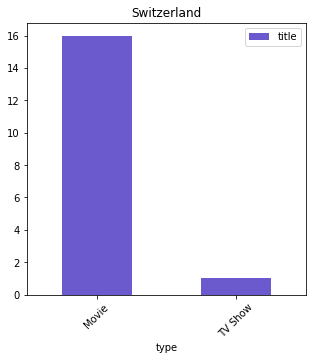

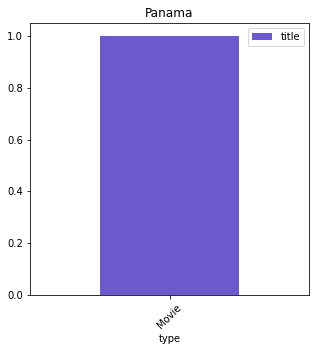

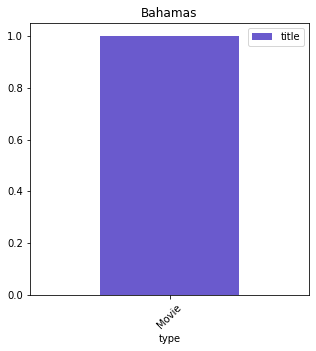

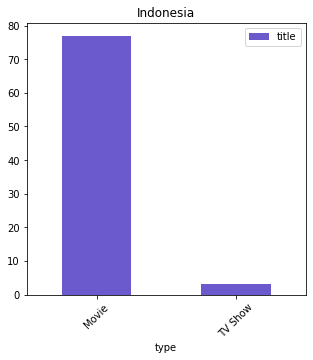

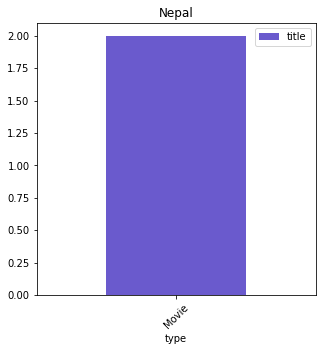

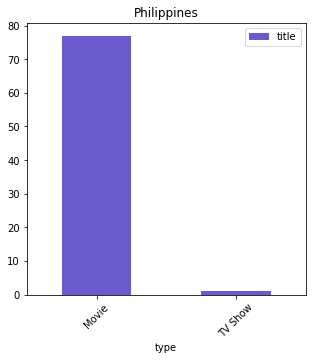

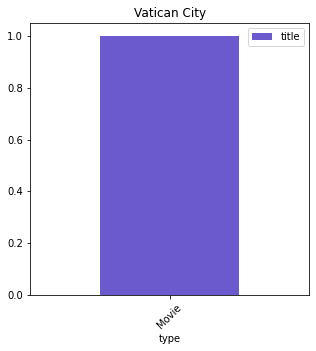

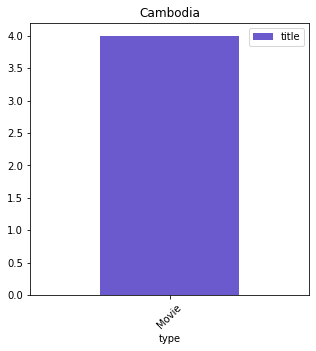

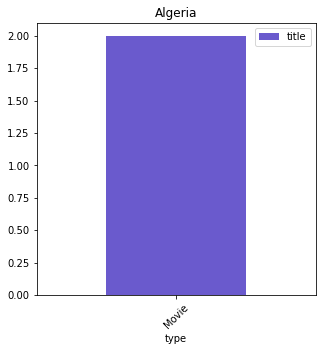

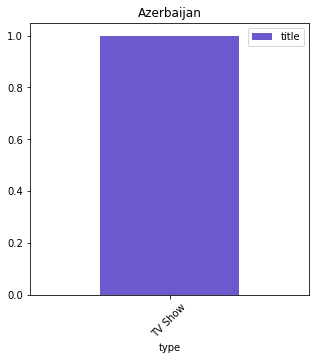

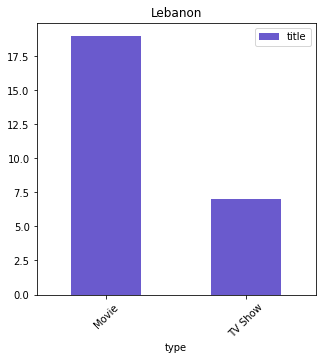

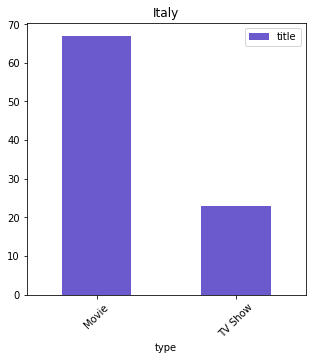

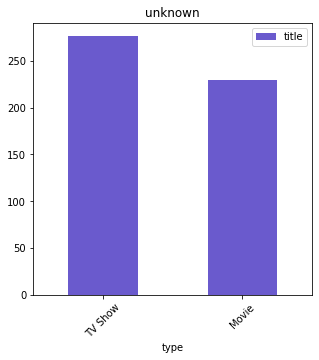

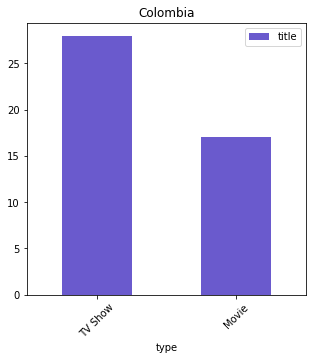

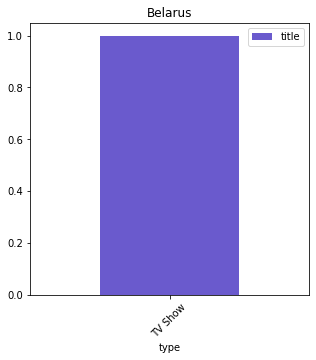

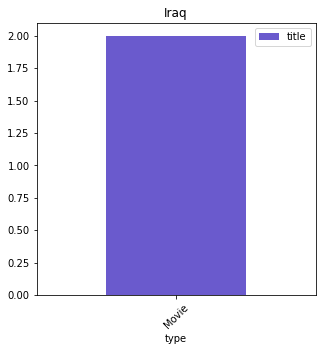

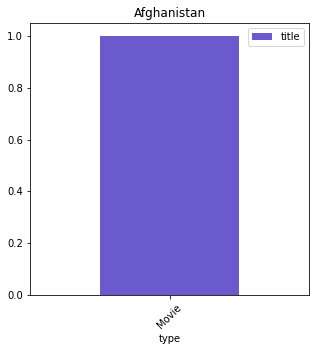

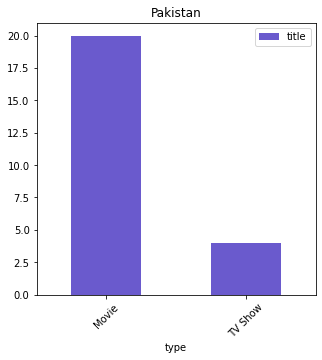

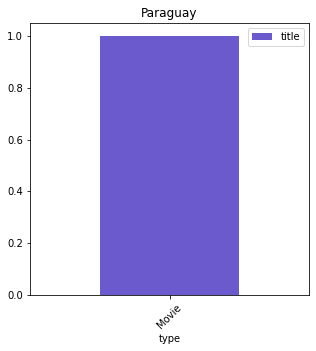

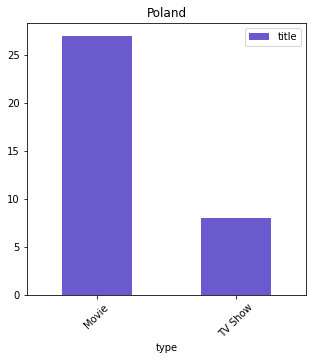

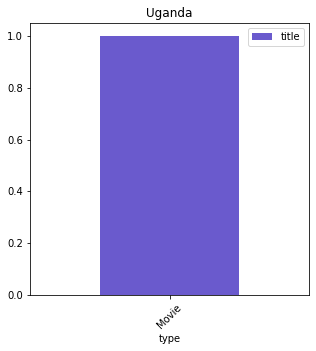

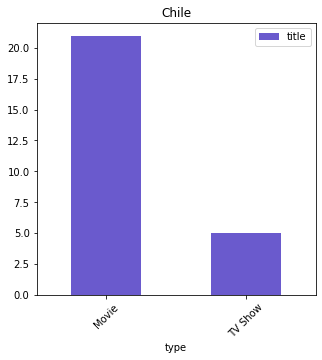

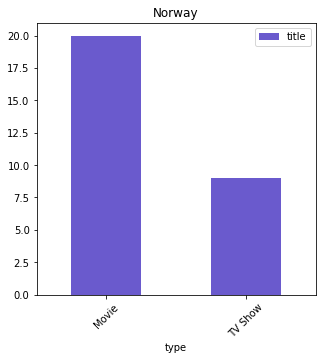

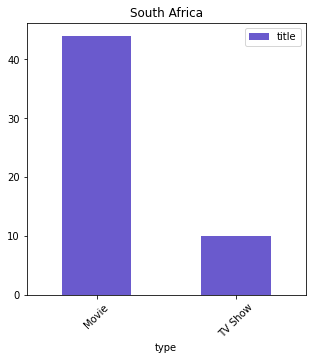

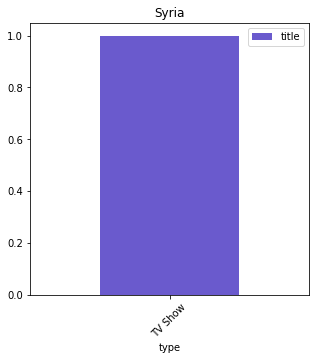

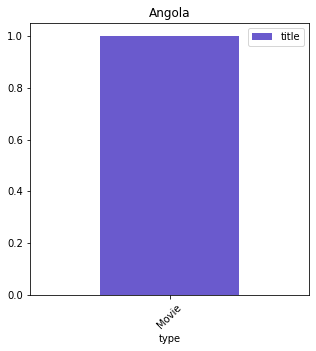

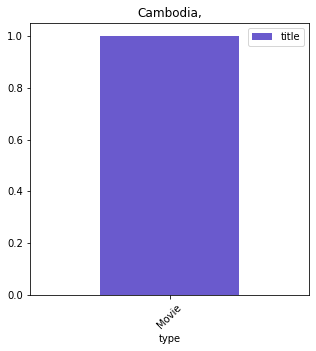

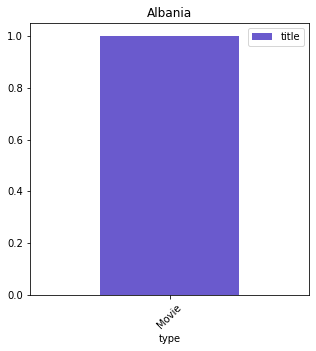

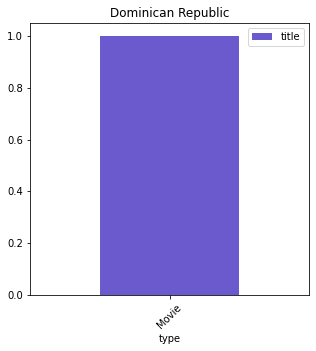

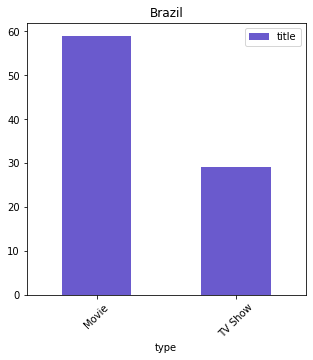

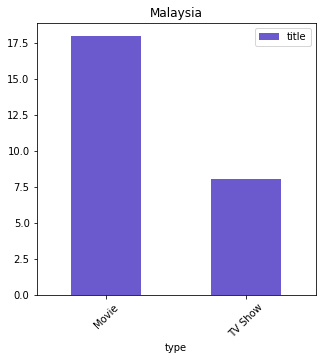

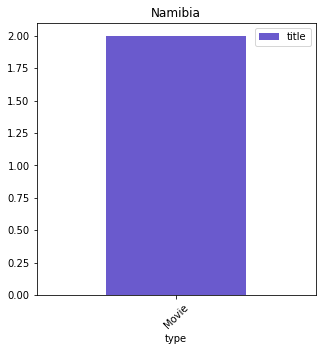

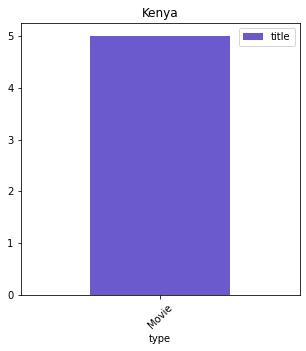

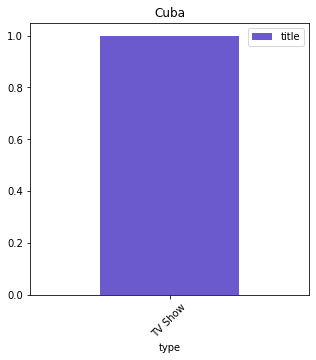

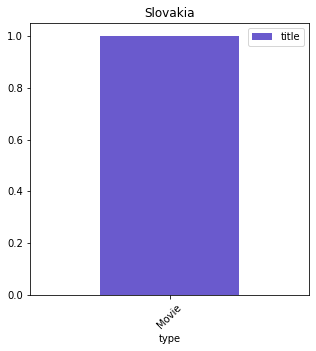

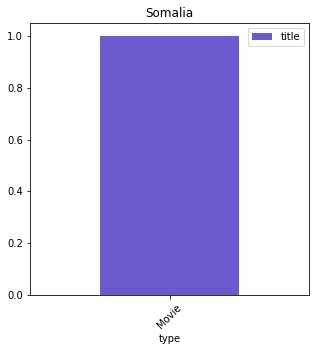

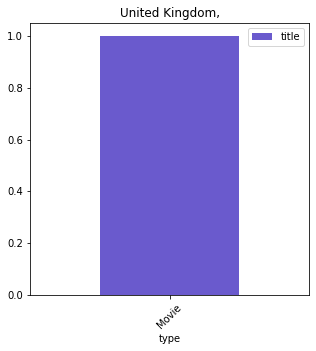

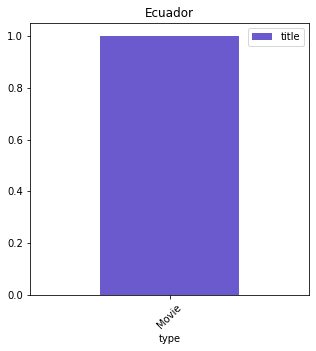

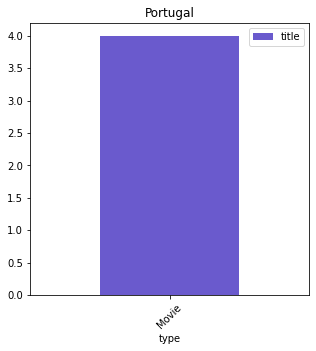

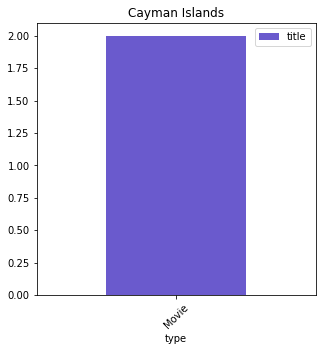

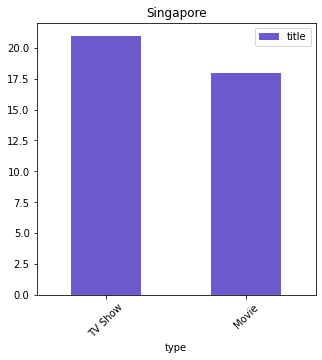

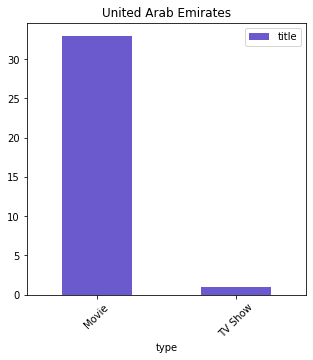

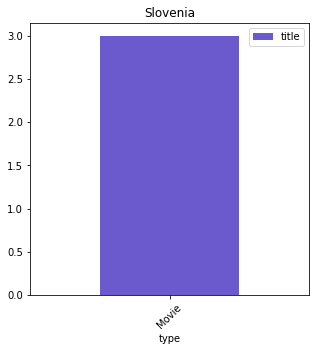

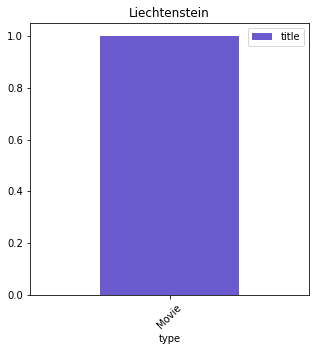

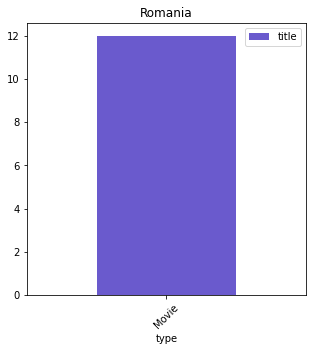

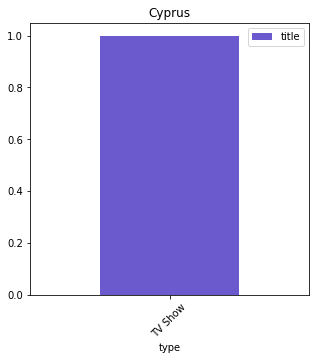

In [103]:
get_country_type_trends(netflix_df)